In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from evalutils import *
from lccv import lccv

In [6]:
import sys
from evalutils import *
from lccv import lccv

if __name__ == '__main__':

    # read params
    folder = "tmp/4711"
    openmlid = 61
    algorithm = "lccv-adaptive"
    seed = 0
    timeout = 60
    
    # load data
    print("Reading dataset")
    X, y = get_dataset(openmlid)
    print("ready. Now running the algorithm")
    
    # creating learner sequence
    learners = [
        (sklearn.svm.LinearSVC, {}),
        (sklearn.tree.DecisionTreeClassifier, {}),
        (sklearn.tree.ExtraTreeClassifier, {}),
        (sklearn.linear_model.LogisticRegression, {}),
        (sklearn.linear_model.PassiveAggressiveClassifier, {}),
        (sklearn.linear_model.Perceptron, {}),
        (sklearn.linear_model.RidgeClassifier, {}),
        (sklearn.linear_model.SGDClassifier, {}),
        (sklearn.neural_network.MLPClassifier, {}),
        (sklearn.discriminant_analysis.LinearDiscriminantAnalysis, {}),
        (sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis, {}),
        (sklearn.naive_bayes.BernoulliNB, {}),
        (sklearn.naive_bayes.MultinomialNB, {}),
        (sklearn.neighbors.KNeighborsClassifier, {}),
        (sklearn.ensemble.ExtraTreesClassifier, {}),
        (sklearn.ensemble.RandomForestClassifier, {}),
        (sklearn.ensemble.GradientBoostingClassifier, {})
    ]
    test_learners = [l[0] for l in learners]
    for _ in range(0):
        test_learners.extend(test_learners)
    random.seed(seed)
    test_learners = random.sample(test_learners, len(test_learners))
    
    # run lccv
    epsilon = 0.0
    if "10cv" in algorithm:
        if "adaptive" in algorithm:
            pass
        else:
            validators = validators = [(mccv, lambda r: r[0])]
            key = "mccv"
    if "lccv" in algorithm:
        if "adaptive" in algorithm:
            validators = validators = [(lccv, lambda r: r[0])]
            key = "lccv"
    
    result = evaluate_validators(validators, test_learners, X, y, timeout, repeats=10, epsilon=epsilon)[key]
    model = result[0]
    runtime = result[1]
    error_rate = np.round(result[2][0], 4)
    print(model, error_rate, runtime)
    
    # write result
    f = open(folder + "/results.txt", "w")
    f.write(str(model) + " " + str(error_rate) + " " + str(runtime))
    f.close()

Reading dataset
ready. Now running the algorithm
-------------------------------
lccv (with seed 0)
-------------------------------
Checking learner <class 'sklearn.naive_bayes.MultinomialNB'>
Running LCCV on (150, 4)-shaped data for learner MultinomialNB() with r = 1.0. Overview:
	min_exp: 6
	max_exp: 7.076815597050832. Seed is 0
Next iteration in validation process. cur_exp = 6/7.076815597050832 (max_exp). Stable anchors: []
Adding point at size 64. Seed is 0. Counter is 0
Training MultinomialNB() on data of shape (64, 4) using seed 0
Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.2558139534883721
Sample computed successfully.
std of [0.25581395]: 0.0
Adding point at size 64. Seed is 1. Counter is 1
Training MultinomialNB() on data of shape (64, 4) using seed 1
Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.2441860465116279
Sample computed successfully.
std of [0.25581395 0.24418605]: 

Confidence bounds for performance interval at 135: (0.0041092042663400455, 0.03589079573365994). Size: 0.031781591467319896
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Estimation process finished, preparing result.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.06976744186046513, 'std': 0.009494146289857296, 'conf': (0.0590240013616304, 0.08051088235929986)}, 135: {'n': 10, 'mean': 0.019999999999999997, 'std': 0.030550504633038926, 'conf': (0.0010649489940449779, 0.03893505100595501)}}
Runtime: 0.1489849090576172 Expected runtime on 135 : 127.67790492957752
Observed score 0.019999999999999997 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 158ms
r is now: 0.019999999999999997
Checking learner <class 'sklearn.svm._classes.LinearSVC'>
Running LCCV on (150, 4)-shaped data for learner LinearSVC() with r = 0.01999999999

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.13333333 0.         0.06666667 0.         0.06666667
 0.06666667 0.         0.        ]: 0.04566232594791833
Confidence bounds for performance interval at 135: (0.012001089553545757, 0.062072984520528285). Size: 0.05007189496698253
Adding point at size 135. Seed is 9. Counter is 9
Training LinearSVC() on data of shape (135, 4) using seed 9
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.1333333333333333
Sample computed successfully.
std of [0.         0.13333333 0.         0.06666667 0.         0.06666667
 0.06666667 0.         0.         0.13333333]: 0.052068331172711015
Confidence bounds for performance interval at 135: (0.019583408147810382, 0.07374992518552292). Size: 0.05416651703771254
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Estima

Sample computed successfully.
std of [0.04545455 0.36363636 0.27272727 0.09090909 0.18181818 0.13636364
 0.18181818]: 0.1001769390944254
Confidence bounds for performance interval at 128: (0.11953855602067626, 0.24409780761568733). Size: 0.12455925159501108
Adding point at size 128. Seed is 7. Counter is 7
Training PassiveAggressiveClassifier() on data of shape (128, 4) using seed 7
Training ready. Obtaining predictions for 22 instances. Error rate of model on 22 instances is 0.2727272727272727
Sample computed successfully.
std of [0.04545455 0.36363636 0.27272727 0.09090909 0.18181818 0.13636364
 0.18181818 0.27272727]: 0.09841197770277713
Confidence bounds for performance interval at 128: (0.1359509646648105, 0.25041267169882586). Size: 0.11446170703401537
Adding point at size 128. Seed is 8. Counter is 8
Training PassiveAggressiveClassifier() on data of shape (128, 4) using seed 8
Training ready. Obtaining predictions for 22 instances. Error rate of model on 22 instances is 0.227272

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.03488372093023251
Sample computed successfully.
std of [0.01162791 0.03488372]: 0.011627906976744151
Confidence bounds for performance interval at 64: (0.009731544724689862, 0.03678008318228685). Size: 0.02704853845759699
Adding point at size 64. Seed is 2. Counter is 2
Training MLPClassifier() on data of shape (64, 4) using seed 2
Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.03488372093023251
Sample computed successfully.
std of [0.01162791 0.03488372 0.03488372]: 0.010962895832349542
Confidence bounds for performance interval at 64: (0.016720795639283362, 0.03754277025218945). Size: 0.02082197461290609
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 7.076815597050832.
Setting exponent to maximally possible in remaining time 59.6921911239624s according to current belief.
Max size in time

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.]: 0.0
Adding point at size 135. Seed is 1. Counter is 1
Training MLPClassifier() on data of shape (135, 4) using seed 1
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.06666666666666665
Sample computed successfully.
std of [0.         0.06666667]: 0.033333333333333326
Confidence bounds for performance interval at 135: (-0.005436238455889135, 0.07210290512255577). Size: 0.07753914357844491
Adding point at size 135. Seed is 2. Counter is 2
Training MLPClassifier() on data of shape (135, 4) using seed 2


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.        ]: 0.03142696805273544
Confidence bounds for performance interval at 135: (-0.007622608056276604, 0.05206705250072102). Size: 0.05968966055699763
Adding point at size 135. Seed is 3. Counter is 3
Training MLPClassifier() on data of shape (135, 4) using seed 3
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.         0.        ]: 0.028867513459481284
Confidence bounds for performance interval at 135: (-0.00707475044078246, 0.04040808377411578). Size: 0.04748283421489824
Adding point at size 135. Seed is 4. Counter is 4
Training MLPClassifier() on data of shape (135, 4) using seed 4


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.        ]: 0.026666666666666658
Confidence bounds for performance interval at 135: (-0.006282690788803053, 0.03294935745546971). Size: 0.03923204824427276
Adding point at size 135. Seed is 5. Counter is 5
Training MLPClassifier() on data of shape (135, 4) using seed 5
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.         0.        ]: 0.02484519974999766
Confidence bounds for performance interval at 135: (-0.005572656208805727, 0.027794878431027938). Size: 0.03336753463983366
Adding point at size 135. Seed is 6. Counter is 6
Training MLPClassifier() on data of shape (135, 4) using seed 6


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.06666666666666665
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.         0.
 0.06666667]: 0.0301169300968417
Confidence bounds for performance interval at 135: (0.0003240370180967386, 0.03777120107714134). Size: 0.0374471640590446
Adding point at size 135. Seed is 7. Counter is 7
Training MLPClassifier() on data of shape (135, 4) using seed 7
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.         0.
 0.06666667 0.        ]: 0.02886751345948128
Confidence bounds for performance interval at 135: (-0.00012105036498891858, 0.03345438369832224). Size: 0.033575434063311156
Adding point at size 135. Seed is 8. Counter is 8
Training MLPClassifier() on data of shape (135, 4) using seed 8


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.0
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.         0.
 0.06666667 0.         0.        ]: 0.027715980642769932
Confidence bounds for performance interval at 135: (-0.0003814289467775015, 0.030011058576407117). Size: 0.030392487523184616
Adding point at size 135. Seed is 9. Counter is 9
Training MLPClassifier() on data of shape (135, 4) using seed 9
Training ready. Obtaining predictions for 15 instances. Error rate of model on 15 instances is 0.06666666666666665
Sample computed successfully.
std of [0.         0.06666667 0.         0.         0.         0.
 0.06666667 0.         0.         0.06666667]: 0.030550504633038926
Confidence bounds for performance interval at 135: (0.0041092042663400455, 0.03589079573365994). Size: 0.031781591467319896
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Estimation 

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.05813953488372092
Sample computed successfully.
std of [0.01162791 0.23255814 0.19767442 0.23255814 0.04651163 0.06976744
 0.03488372 0.19767442 0.05813953]: 0.08701528806451027
Confidence bounds for performance interval at 64: (0.0724459013686443, 0.16786417615073557). Size: 0.09541827478209126
Next iteration in validation process. cur_exp = 7/7.076815597050832 (max_exp). Stable anchors: [6]
Adding point at size 128. Seed is 0. Counter is 0
Training SGDClassifier() on data of shape (128, 4) using seed 0
Training ready. Obtaining predictions for 22 instances. Error rate of model on 22 instances is 0.09090909090909094
Sample computed successfully.
std of [0.09090909]: 0.0
Adding point at size 128. Seed is 1. Counter is 1
Training SGDClassifier() on data of shape (128, 4) using seed 1
Training ready. Obtaining predictions for 22 instances. Error rate of model on 22 instances is 0.272727272727

Running LCCV on (150, 4)-shaped data for learner RandomForestClassifier() with r = 0.019999999999999997. Overview:
	min_exp: 6
	max_exp: 7.076815597050832. Seed is 0
Next iteration in validation process. cur_exp = 6/7.076815597050832 (max_exp). Stable anchors: []
Adding point at size 64. Seed is 0. Counter is 0
Training RandomForestClassifier() on data of shape (64, 4) using seed 0
Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.03488372093023251
Sample computed successfully.
std of [0.03488372]: 0.0
Adding point at size 64. Seed is 1. Counter is 1
Training RandomForestClassifier() on data of shape (64, 4) using seed 1
Training ready. Obtaining predictions for 86 instances. Error rate of model on 86 instances is 0.06976744186046513
Sample computed successfully.
std of [0.03488372 0.06976744]: 0.01744186046511631
Confidence bounds for performance interval at 64: (0.03203917755215098, 0.07261198523854664). Size: 0.040572807686395665
Adding

FileNotFoundError: [Errno 2] No such file or directory: 'tmp/4711/results.txt'

In [14]:
print(", ".join([l[0].__module__[:l[0].__module__.rindex(".")] + "." + l[0].__name__ for l in learners]))

sklearn.svm.LinearSVC, sklearn.tree.DecisionTreeClassifier, sklearn.tree.ExtraTreeClassifier, sklearn.linear_model.LogisticRegression, sklearn.linear_model.PassiveAggressiveClassifier, sklearn.linear_model.Perceptron, sklearn.linear_model.RidgeClassifier, sklearn.linear_model.SGDClassifier, sklearn.neural_network.MLPClassifier, sklearn.LinearDiscriminantAnalysis, sklearn.QuadraticDiscriminantAnalysis, sklearn.BernoulliNB, sklearn.MultinomialNB, sklearn.neighbors.KNeighborsClassifier, sklearn.ensemble.ExtraTreesClassifier, sklearn.ensemble.RandomForestClassifier, sklearn.ensemble.GradientBoostingClassifier


# Queries:
## Progress
```sql
SELECT total, open, CONCAT(ROUND(100 * open / total, 2), "%") as "open (rel)", running, CONCAT(ROUND(100 * running / total, 2), "%") as "running (rel)", finished, CONCAT(ROUND(100 * finished / total, 2), "%") as "finished (rel)", successful, failed, CONCAT(ROUND(100 * successful / (successful + failed), 2), "%") as "success rate", CONCAT(ROUND(avgRuntimeFinished), "s") as "Average Time of Finished", CONCAT(ROUND(avgRuntimeFinished * open / running), "s") as "ETA" FROM (SELECT "aux" as pk, COUNT(*) as "open" FROM `lccv` WHERE time_started is null) as t1 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as "running" FROM `lccv` WHERE time_started is not null and time_end is null) as t2 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as finished, AVG(TIMESTAMPDIFF(SECOND, time_started, time_end)) as avgRuntimeFinished  FROM `lccv` WHERE time_started is not null and time_end is not null) as t3 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as successful FROM `lccv` where time_end is not null and exception is null) as t4 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as failed FROM `lccv` where exception is not null) as t5 NATURAL JOIN (SELECT "aux" as pk, COUNT(*) as total FROM `lccv`) as t6

```

## Results
### Bare Results (60s timeout)
```sql
SELECT openmlid, algorithm, seed, chosenmodel, errorrate, runtime FROM `lccv` WHERE timeout = 60 and time_end is not null and exception is null
```

### Comparisons For Figure (60s timeout)
```sql
SELECT openmlid, round(avg(errorrate_lccv), 3) as avg_error_lccv, round(avg(errorrate_10cv), 3) as avg_error_10cv, round(avg(runtime_lccv)) as avg_runtime_lccv, round(avg(runtime_10cv)) as avg_runtime_10cv, count(runtime_lccv), count(runtime_10cv) FROM (
SELECT openmlid, seed, timeout, errorrate_lccv, errorrate_10cv, model_lccv, model_10cv, runtime_lccv, runtime_10cv, ei_lccv FROM 
        (SELECT openmlid, seed, timeout, errorrate as errorrate_lccv, chosenmodel as model_lccv, runtime as runtime_lccv, executor as ei_lccv FROM `lccv` WHERE algorithm = "lccv-adaptive" and timeout=60 and time_started is not null) as t1
        NATURAL JOIN
        (SELECT openmlid, seed, timeout, errorrate as errorrate_10cv, chosenmodel as model_10cv, runtime as runtime_10cv FROM `lccv` WHERE algorithm = "10cv-fix" and timeout=60 and time_started is not null) as t2
) as t where errorrate_lccv is not null and errorrate_10cv  IS NOT NULL group by openmlid
```

## Number of wins/losses
```sql
SELECT SUM(win_error) / COUNT(*), SUM(win_runtime) / COUNT(*) FROM (
	SELECT openmlid, round(errorrate_lccv, 4) <= round(errorrate_10cv, 4) as win_error, round(runtime_lccv) <= round(runtime_10cv) as win_runtime FROM
		(SELECT openmlid, seed, errorrate as errorrate_lccv, runtime as runtime_lccv FROM `lccv` WHERE algorithm = "lccv-adaptive" and timeout=60) as t1
		NATURAL JOIN
		(SELECT openmlid, seed, errorrate as errorrate_10cv, runtime as runtime_10cv FROM `lccv` WHERE algorithm = "10cv-fix" and timeout=60) as t2
	) as t_outer WHERE win_error is not null and win_runtime is not null
```


## Cases of Missed Optimality
### Any Misses
```sql
SELECT openmlid, seed, timeout, errorrate_lccv, errorrate_10cv, model_lccv, model_10cv, runtime_lccv, runtime_10cv, ei_lccv FROM 
        (SELECT openmlid, seed, timeout, errorrate as errorrate_lccv, chosenmodel as model_lccv, runtime as runtime_lccv, executor as ei_lccv FROM `lccv` WHERE algorithm = "lccv-adaptive" and timeout=60 and time_started is not null) as t1
        NATURAL JOIN
        (SELECT openmlid, seed, timeout, errorrate as errorrate_10cv, chosenmodel as model_10cv, runtime as runtime_10cv FROM `lccv` WHERE algorithm = "10cv-fix" and timeout=60 and time_started is not null) as t2
    WHERE errorrate_10cv < errorrate_lccv and model_lccv != model_10cv ORDER BY openmlid, seed
```

### Substantial Misses
```sql
SELECT openmlid, seed, timeout, errorrate_lccv, errorrate_10cv, model_lccv, model_10cv, runtime_lccv, runtime_10cv, ei_lccv FROM 
        (SELECT openmlid, seed, timeout, errorrate as errorrate_lccv, chosenmodel as model_lccv, runtime as runtime_lccv, executor as ei_lccv FROM `lccv` WHERE algorithm = "lccv-adaptive" and timeout=60 and time_started is not null) as t1
        NATURAL JOIN
        (SELECT openmlid, seed, timeout, errorrate as errorrate_10cv, chosenmodel as model_10cv, runtime as runtime_10cv FROM `lccv` WHERE algorithm = "10cv-fix" and timeout=60 and time_started is not null) as t2
    WHERE errorrate_10cv < errorrate_lccv - 0.005 and model_lccv != model_10cv ORDER BY openmlid, seed
```

In [6]:
datasets_dense = [1485, 1515, 1475, 1468, 1489, 23512, 23517, 40981, 40982, 40983, 40984, 40701, 40685, 40900,  1111, 40498, 41161, 41162, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41142, 41143, 41144, 41145, 41146, 41150, 41156, 41157, 41158,  41159, 41138, 54, 181, 188, 1461, 1494, 1464, 12, 23, 3, 1487, 40668, 1067, 1049, 40975, 31]
#1457
datasets_sparse = [1590, 1486, 4534, 4541, 4538, 4134, 4135, 40978, 40996, 41027, 40670, 42732, 42733, 42734, 41147]
datasets = datasets_dense

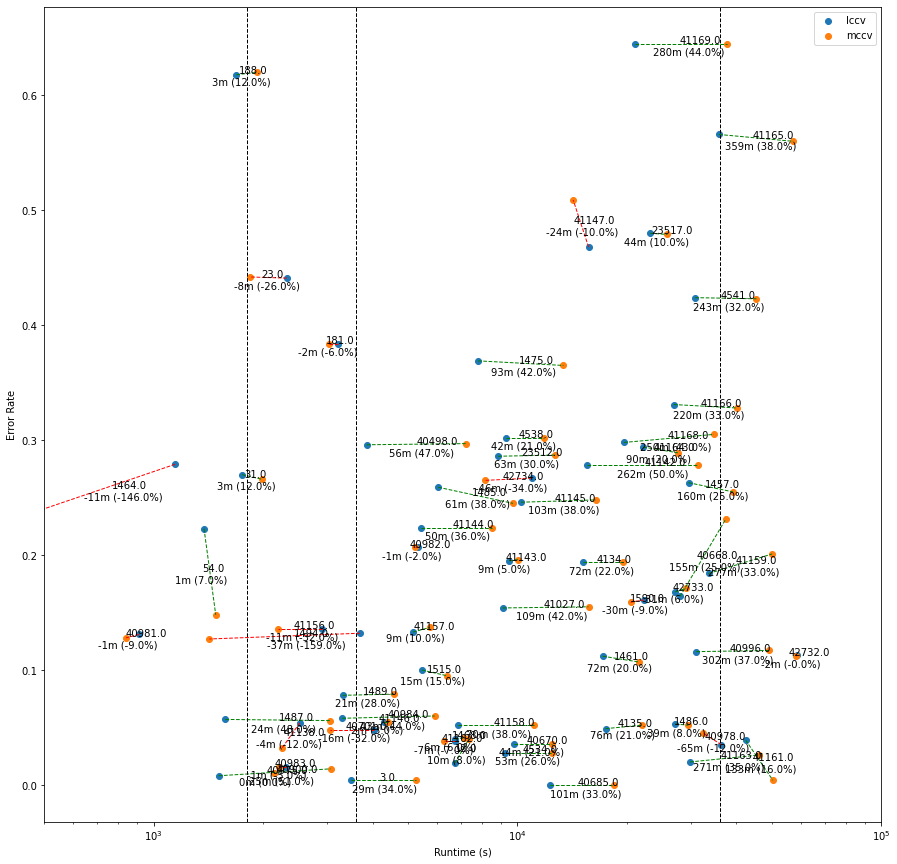

In [71]:
dfResults = pd.read_csv("results_random.csv", delimiter=";")
fig, ax = plt.subplots(figsize=(15, 15))
i = 0
for i, row in dfResults.iterrows():
    openmlid = row["openmlid"]
    lccv = [row["avg_error_lccv"], row["avg_runtime_lccv"]]
    mccv = [row["avg_error_10cv"], row["avg_runtime_10cv"]]
    ax.scatter(lccv[1], lccv[0], color="C0", label="lccv" if i == 0 else None)
    ax.scatter(mccv[1], mccv[0], color="C1", label="mccv" if i == 0 else None)
    ax.plot([lccv[1], mccv[1]], [lccv[0], mccv[0]], color="green" if lccv[1] < mccv[1] else "red", linestyle="--", linewidth=1)
    ax.text((lccv[1] + mccv[1]) / 2.1, (lccv[0] + mccv[0]) / 2, openmlid)
    avg_time_saving = int((mccv[1] - lccv[1]) / 60)
    avg_reduction = np.round((1 - lccv[1] / mccv[1]) * 100)
    ax.text((lccv[1] + mccv[1]) / 2.5, (lccv[0] + mccv[0]) / 2 - 0.01, str(avg_time_saving) + "m (" + str(avg_reduction) + "%)")
    i += 1
ax.set_xlabel("Runtime (s)")
ax.set_ylabel("Error Rate")
ax.axvline(1800, linestyle="--", color="black", linewidth=1)
ax.axvline(3600, linestyle="--", color="black", linewidth=1)
ax.axvline(36000, linestyle="--", color="black", linewidth=1)
ax.set_xlim([5 * 10**2, 10**5])
ax.set_xscale("log")
ax.legend()

In [1]:
dfResults = pd.read_csv("results_random.csv", delimiter=";")
fig, ax = plt.subplots(figsize=(15, 15))
i = 0
abs_runtimes_lccv = []
abs_runtimes_mccv = []
abs_savings = []
rel_reductions = []
performance_devs = []
abs_performances_lccv = []
abs_performances_mccv = []
for i, row in dfResults.iterrows():
    openmlid = row["openmlid"]
    lccv = [row["avg_error_lccv"], row["avg_runtime_lccv"]]
    mccv = [row["avg_error_10cv"], row["avg_runtime_10cv"]]
    ax.scatter(lccv[1], lccv[0], color="C0", label="lccv" if i == 0 else None)
    ax.scatter(mccv[1], mccv[0], color="C1", label="mccv" if i == 0 else None)
    ax.plot([lccv[1], mccv[1]], [lccv[0], mccv[0]], color="green" if lccv[1] < mccv[1] else "red", linestyle="--", linewidth=1)
    ax.text((lccv[1] + mccv[1]) / 2.1, (lccv[0] + mccv[0]) / 2, int(openmlid))
    abs_performances_lccv.append(lccv[0])
    abs_performances_mccv.append(mccv[0])
    abs_runtimes_lccv.append(lccv[1] / 60)
    abs_runtimes_mccv.append(mccv[1] / 60)
    avg_time_saving = int((mccv[1] - lccv[1]) / 60)
    avg_reduction = np.round((1 - lccv[1] / mccv[1]) * 100)
    abs_savings.append(avg_time_saving)
    rel_reductions.append(avg_reduction)
    performance_devs.append(lccv[0] - mccv[0])
    ax.text((lccv[1] + mccv[1]) / 2.5, (lccv[0] + mccv[0]) / 2 - 0.01, str(avg_time_saving) + "m (" + str(avg_reduction) + "%)")
    i += 1
ax.set_xlabel("Runtime (s)")
ax.set_ylabel("Error Rate")
ax.axvline(1800, linestyle="--", color="black", linewidth=1)
ax.axvline(3600, linestyle="--", color="black", linewidth=1)
ax.axvline(36000, linestyle="--", color="black", linewidth=1)
ax.set_xlim([5 * 10**2, 10**5])
ax.set_xscale("log")
ax.legend()
fig.tight_layout()
fig.savefig("plots/results-randomsearch-scatter.pdf")
plt.show()

print("Avg runtimes LCCV:", np.mean(abs_runtimes_lccv))
print("Avg runtimes MCCV:", np.mean(abs_runtimes_mccv))
print("Median runtime reduction:", np.median(abs_savings), str(np.median(rel_reductions)) + "%")
print("Q3 runtime reduction:", np.percentile(abs_savings, 75), str(np.percentile(rel_reductions, 75)) + "%")
print("Average runtime reduction:", np.mean(abs_savings), str(np.mean(rel_reductions)) + "%")
print("Average runtime increase (only among the cases of increase):", np.median([s for s in abs_savings if s < 0]), str(np.mean([s for s in rel_reductions if s < 0])) + "%")
fig, ax = plt.subplots(1, 4, figsize=(8, 3), gridspec_kw={'width_ratios': [1.2, 1, 1, 1]})
ax[0].boxplot([abs_runtimes_lccv, abs_runtimes_mccv])
ax[0].set_title("Absolute\nRuntimes (m)")
ax[0].set_xticklabels(["LCCV", "10CV"])
ax[1].boxplot(abs_savings)
ax[1].set_title("Absolute\nReductions (m)")
ax[1].axhline(np.mean(abs_savings), linestyle="--", linewidth=1, color="black")
ax[2].boxplot(rel_reductions)
ax[2].axhline(np.mean(rel_reductions), linestyle="--", linewidth=1, color="black")
ax[2].set_title("Relative\nReductions (%)")
ax[3].boxplot(performance_devs)
ax[3].set_title("Absolute\nPerformance Diff.")
for i in range(1, 4):
    ax[i].set_xticklabels([])
fig.tight_layout()
fig.savefig("plots/results-randomsearch-boxplots.pdf")
plt.show()

np.mean(np.array(abs_performances_lccv) <= np.array(abs_performances_mccv) + 0.005)

NameError: name 'pd' is not defined

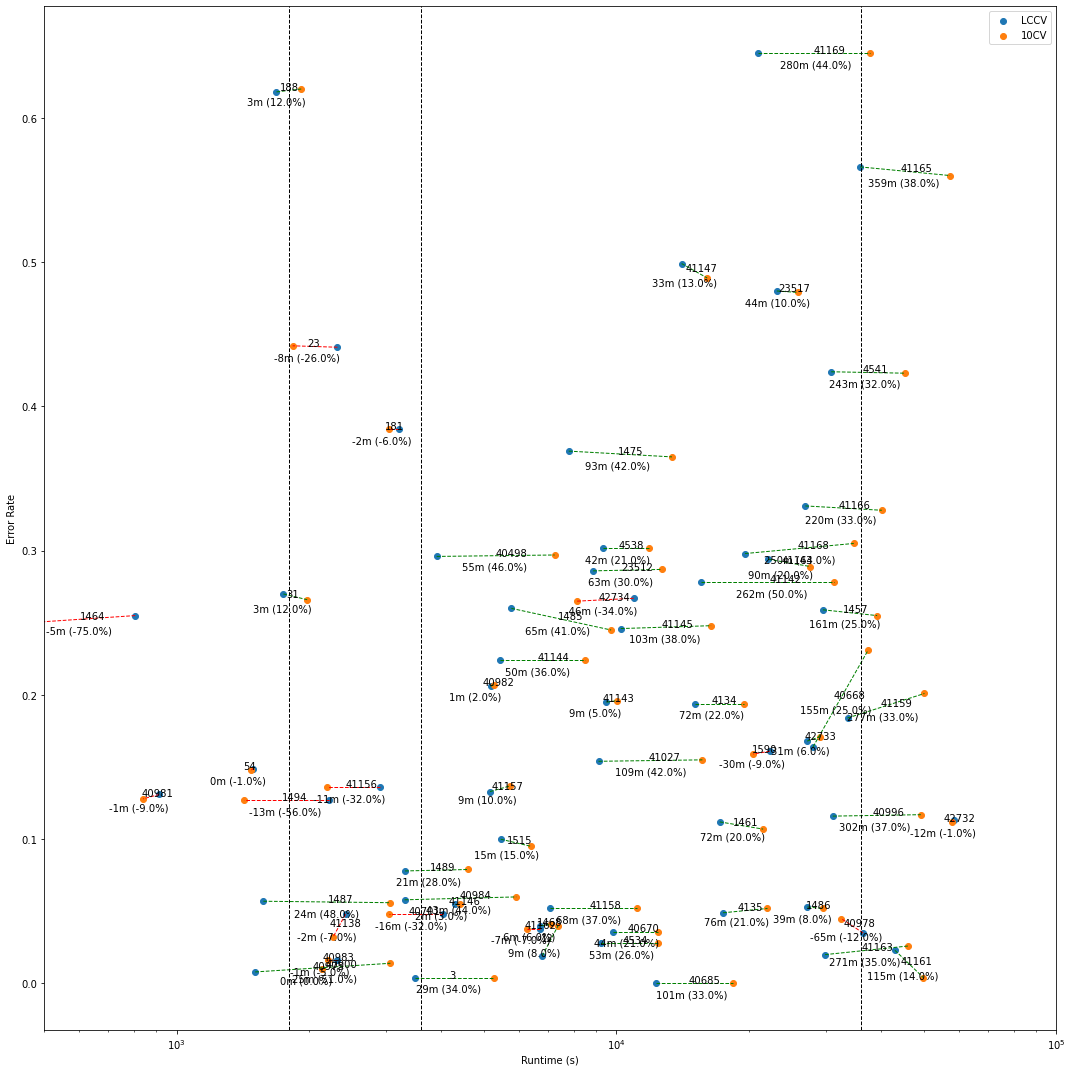

Avg runtimes LCCV: 222.04596774193547
Avg runtimes MCCV: 289.67849462365604
Median runtime reduction: 36.0 20.0%
Q3 runtime reduction: 92.25 34.75%
Average runtime reduction: 67.38709677419355 14.64516129032258%
Average runtime increase (only among the cases of increase): -9.5 -20.8%


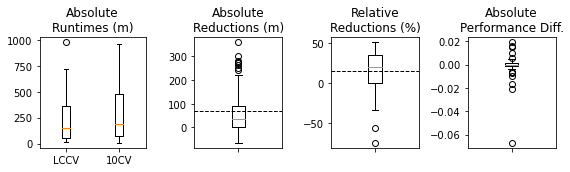

0.9193548387096774

In [22]:
dfResults = pd.read_csv("results_random.csv", delimiter=";")
fig, ax = plt.subplots(figsize=(15, 15))
i = 0
abs_runtimes_lccv = []
abs_runtimes_mccv = []
abs_savings = []
rel_reductions = []
performance_devs = []
abs_performances_lccv = []
abs_performances_mccv = []
for i, row in dfResults.iterrows():
    openmlid = row["openmlid"]
    lccv = [row["avg_error_lccv"], row["avg_runtime_lccv"]]
    mccv = [row["avg_error_10cv"], row["avg_runtime_10cv"]]
    ax.scatter(lccv[1], lccv[0], color="C0", label="LCCV" if i == 0 else None)
    ax.scatter(mccv[1], mccv[0], color="C1", label="10CV" if i == 0 else None)
    ax.plot([lccv[1], mccv[1]], [lccv[0], mccv[0]], color="green" if lccv[1] < mccv[1] else "red", linestyle="--", linewidth=1)
    ax.text((lccv[1] + mccv[1]) / 2.1, (lccv[0] + mccv[0]) / 2, int(openmlid))
    abs_performances_lccv.append(lccv[0])
    abs_performances_mccv.append(mccv[0])
    abs_runtimes_lccv.append(lccv[1] / 60)
    abs_runtimes_mccv.append(mccv[1] / 60)
    avg_time_saving = int((mccv[1] - lccv[1]) / 60)
    avg_reduction = np.round((1 - lccv[1] / mccv[1]) * 100)
    abs_savings.append(avg_time_saving)
    rel_reductions.append(avg_reduction)
    performance_devs.append(lccv[0] - mccv[0])
    ax.text((lccv[1] + mccv[1]) / 2.5, (lccv[0] + mccv[0]) / 2 - 0.01, str(avg_time_saving) + "m (" + str(avg_reduction) + "%)")
    i += 1
ax.set_xlabel("Runtime (s)")
ax.set_ylabel("Error Rate")
ax.axvline(1800, linestyle="--", color="black", linewidth=1)
ax.axvline(3600, linestyle="--", color="black", linewidth=1)
ax.axvline(36000, linestyle="--", color="black", linewidth=1)
ax.set_xlim([5 * 10**2, 10**5])
ax.set_xscale("log")
ax.legend()
fig.tight_layout()
fig.savefig("plots/results-randomsearch-scatter.pdf")
plt.show()

print("Avg runtimes LCCV:", np.mean(abs_runtimes_lccv))
print("Avg runtimes MCCV:", np.mean(abs_runtimes_mccv))
print("Median runtime reduction:", np.median(abs_savings), str(np.median(rel_reductions)) + "%")
print("Q3 runtime reduction:", np.percentile(abs_savings, 75), str(np.percentile(rel_reductions, 75)) + "%")
print("Average runtime reduction:", np.mean(abs_savings), str(np.mean(rel_reductions)) + "%")
print("Average runtime increase (only among the cases of increase):", np.median([s for s in abs_savings if s < 0]), str(np.mean([s for s in rel_reductions if s < 0])) + "%")
fig, ax = plt.subplots(1, 4, figsize=(8, 2.5), gridspec_kw={'width_ratios': [1.2, 1, 1, 1]})
ax[0].boxplot([abs_runtimes_lccv, abs_runtimes_mccv])
ax[0].set_title("Absolute\nRuntimes (m)")
ax[0].set_xticklabels(["LCCV", "10CV"])
ax[1].boxplot(abs_savings)
ax[1].set_title("Absolute\nReductions (m)")
ax[1].axhline(np.mean(abs_savings), linestyle="--", linewidth=1, color="black")
ax[2].boxplot(rel_reductions)
ax[2].axhline(np.mean(rel_reductions), linestyle="--", linewidth=1, color="black")
ax[2].set_title("Relative\nReductions (%)")
ax[3].boxplot(performance_devs)
ax[3].set_title("Absolute\nPerformance Diff.")
for i in range(1, 4):
    ax[i].set_xticklabels([])
fig.tight_layout()
fig.savefig("plots/results-randomsearch-boxplots.pdf")
plt.show()

np.mean(np.array(abs_performances_lccv) <= np.array(abs_performances_mccv) + 0.005)

In [17]:
df_results_bare = pd.read_csv("data/results_randomsearch_bare.csv", delimiter=";")
df_results_bare = df_results_bare[df_results_bare["algorithm"] != "10cv-adaptive"]
df_results_bare

,openmlid,algorithm,seed,chosenmodel,errorrate,runtime
393,1485,lccv-adaptive,0,GradientBoostingClassifier,0.2617,5771
394,1485,10cv-fix,0,DecisionTreeClassifier,0.2488,9850
395,1485,lccv-adaptive,1,GradientBoostingClassifier,0.2621,5752
396,1590,lccv-adaptive,0,LinearSVC,0.1618,21744
397,1590,10cv-fix,0,LinearSVC,0.1589,20570
...,...,...,...,...,...,...
1584,31,10cv-fix,7,GradientBoostingClassifier,0.2594,2170
1585,40975,10cv-fix,9,MLPClassifier,0.0102,2219
1586,31,lccv-adaptive,9,MLPClassifier,0.2666,1637
1587,31,10cv-fix,8,MLPClassifier,0.2703,1945


In [18]:
# rerun lccv on:
# 54, 1464, 1494
df_results_bare.query("openmlid == 41147").sort_values("algorithm")

,openmlid,algorithm,seed,chosenmodel,errorrate,runtime
1159,41147,10cv-fix,0,GradientBoostingClassifier,0.4956,15948
1261,41147,10cv-fix,7,GradientBoostingClassifier,0.4889,16082
1290,41147,10cv-fix,8,ExtraTreeClassifier,0.5111,17269
1181,41147,lccv-adaptive,3,KNeighborsClassifier,0.4444,14952
1252,41147,lccv-adaptive,7,ExtraTreeClassifier,0.4989,14067


In [20]:
#combos = [u[0] + ", " + u[1] for u in it.product(["$\\varepsilon$=" + str(v) for v in DOMAIN_EPS], ["t=" + str(v) for v in DOMAIN_TIMEOUTS])]
rows = []
for openmlid in sorted(pd.unique(df_results_bare["openmlid"])):
    df_ds = df_results_bare[df_results_bare["openmlid"] == openmlid]
    df_lccv = df_ds[df_ds["algorithm"] == "lccv-adaptive"]
    df_10cv = df_ds[df_ds["algorithm"] == "10cv-fix"]
    #print(openmlid, len(df_lccv), len(df_10cv))
    performance_lccv = str(np.round(np.mean(df_lccv["errorrate"]), 2)) + "$\pm$" + '{:04.2f}'.format(np.std(df_lccv["errorrate"]), 2)
    performance_10cv = str(np.round(np.mean(df_10cv["errorrate"]), 2)) + "$\pm$" + '{:04.2f}'.format(np.std(df_10cv["errorrate"]), 2)
    runtime_lccv = str(int(np.round(np.mean(df_lccv["runtime"])))) + "$\pm$" + str(int(np.round(np.std(df_lccv["runtime"]))))
    runtime_10cv = str(int(np.round(np.mean(df_10cv["runtime"])))) + "$\pm$" + str(int(np.round(np.std(df_10cv["runtime"]))))
    rows.append([openmlid, performance_lccv, runtime_lccv, performance_10cv, runtime_10cv])
columns = ["openmlid", "LCCV Performance", "LCCV Runtime", "10CV Perf", "10CV Runtime"]
print(pd.DataFrame(rows, columns=columns).to_latex(index=False, escape=False))

\begin{tabular}{rllll}
\toprule
 openmlid & LCCV Performance &    LCCV Runtime &      10CV Perf &    10CV Runtime \\
\midrule
        3 &     0.0$\pm$0.00 &    3491$\pm$211 &   0.0$\pm$0.00 &    5277$\pm$116 \\
       12 &    0.02$\pm$0.00 &    6779$\pm$444 &  0.04$\pm$0.00 &    7366$\pm$121 \\
       23 &    0.44$\pm$0.00 &    2320$\pm$125 &  0.44$\pm$0.00 &     1836$\pm$56 \\
       31 &    0.27$\pm$0.00 &    1749$\pm$158 &  0.27$\pm$0.01 &     1981$\pm$88 \\
       54 &    0.15$\pm$0.00 &    1485$\pm$159 &  0.15$\pm$0.00 &     1479$\pm$44 \\
      181 &    0.38$\pm$0.00 &    3211$\pm$250 &  0.38$\pm$0.00 &    3038$\pm$130 \\
      188 &    0.62$\pm$0.01 &    1687$\pm$173 &  0.62$\pm$0.02 &    1920$\pm$102 \\
     1457 &    0.26$\pm$0.01 &   29324$\pm$705 &  0.26$\pm$0.00 &   39150$\pm$213 \\
     1461 &    0.11$\pm$0.00 &   17190$\pm$240 &  0.11$\pm$0.00 &   21550$\pm$264 \\
     1464 &    0.25$\pm$0.02 &     805$\pm$148 &  0.25$\pm$0.02 &      459$\pm$25 \\
     1468 &    0.04$\pm$

In [21]:
print(len(rows))

62


In [3]:
def evaluate_validators(validators, learners, X, y, timeout_per_evaluation, epsilon):
    out = {}
    performances = {}
    for validator, result_parser in validators:
        
        print("-------------------------------\n" + validator.__name__ + "\n-------------------------------")
        time_start = time.time()
        chosen_learner = select_model((validator, result_parser), learners, X, y, timeout_per_evaluation, epsilon)[0]
        runtime = int(np.round(time.time() - time_start))
        print("Chosen learner is " + str(chosen_learner) + ". Now computing its definitive performance.")
        if chosen_learner is None:
            out[validator.__name__] = ("n/a", runtime, np.nan)
        else:
            if not chosen_learner.__name__ in performances:
                performances[chosen_learner.__name__] = mccv(chosen_learner(), X, y, seed=4711)
            out[validator.__name__] = (chosen_learner.__name__, runtime, performances[chosen_learner.__name__])
    return out


learners = [
    (sklearn.svm.LinearSVC, {}),
    (sklearn.tree.DecisionTreeClassifier, {}),
    (sklearn.tree.ExtraTreeClassifier, {}),
    (sklearn.linear_model.LogisticRegression, {}),
    (sklearn.linear_model.PassiveAggressiveClassifier, {}),
    (sklearn.linear_model.Perceptron, {}),
    (sklearn.linear_model.RidgeClassifier, {}),
    (sklearn.linear_model.SGDClassifier, {}),
    (sklearn.neural_network.MLPClassifier, {}),
    (sklearn.discriminant_analysis.LinearDiscriminantAnalysis, {}),
    (sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis, {}),
    (sklearn.naive_bayes.BernoulliNB, {}),
    (sklearn.naive_bayes.MultinomialNB, {}),
    (sklearn.neighbors.KNeighborsClassifier, {}),
    (sklearn.ensemble.ExtraTreesClassifier, {}),
    (sklearn.ensemble.RandomForestClassifier, {}),
    (sklearn.ensemble.GradientBoostingClassifier, {})
]

In [ ]:
test_learners = [l[0] for l in learners]
print(len(test_learners))
for _ in range(3):
    test_learners.extend(test_learners)
print(len(test_learners))
test_learners = random.sample(test_learners, len(test_learners))
#test_learners = [sklearn.ensemble.RandomForestClassifier, sklearn.svm.LinearSVC]
#validators = [(lccv, lambda r: r[0]), (mccv, lambda r: r[0])]
#validators = [(lccv, lambda r: r[0])]
validators = [(mccv, lambda r: r[0])]
epsilon = 0.0
start = False
for openmlid in [54]:
    
    print(validators)
    X, y = get_dataset(openmlid)
    print("dataset " + str(openmlid) + " (" + str(X.shape) + ")")
    print("90% correspond to " + str(.9 * X.shape[0]) + " instances.")
    performances = evaluate_validators(validators, test_learners, X, y, 60, epsilon, seed=17)
    print(performances)

17
136
[(<function mccv at 0x7f3f2ba3cb90>, <function <lambda> at 0x7f3f2a9f19e0>)]
dataset 54 ((846, 18))
90% correspond to 761.4 instances.
-------------------------------
mccv (with seed 17)
-------------------------------
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.35882352941176465 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 59ms
r is now: 0.35882352941176465
Checking learner <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.14823529411764708 fo

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 222
Seed in MCCV: 223


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 224
Seed in MCCV: 225


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 226
Seed in MCCV: 227


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 228
Seed in MCCV: 229


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 230
Observed score 0.34235294117647064 for <class 'sklearn.svm._classes.LinearSVC'>. Validation took 1384ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.2776470588235294 for <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>. Validation took 1217ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.2658823529411765 for <class 'sklearn.linear_model._ridge.RidgeClassifier'>. Validation took 41ms
r is now: 0.14823529411764708


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.30117647058823527 for <class 'sklearn.linear_model._logistic.LogisticRegression'>. Validation took 454ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._logistic.LogisticRegression'>
Running mccv with seed 17
Seed in MCCV: 221


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.30117647058823527 for <class 'sklearn.linear_model._logistic.LogisticRegression'>. Validation took 453ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.35882352941176465 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 60ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._perceptron.Perceptron'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.5494117647058824 for <class 'sklearn.l

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 222
Observed score 0.6 for <class 'sklearn.svm._classes.LinearSVC'>. Validation took 305ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.42614379084967324 for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>. Validation took 191ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.35882352941176465 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 82ms
r is

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 222
Observed score 0.47058823529411764 for <class 'sklearn.svm._classes.LinearSVC'>. Validation took 175ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Observed score nan for <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>. Validation took 177ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.svm._classes.LinearSVC'>
Running mccv with seed 17
Seed in MCCV: 221
Observed score nan for <class 'sklearn.svm._classes.LinearSVC'>. Validation took 168ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.49058823529411766 for <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'>. Validation took 115ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.14823529411764708 for <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>. Validation took 49ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.naive_bayes.BernoulliNB'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Observed score 0.8 for <class 'sklearn.naive_bayes.BernoulliNB'>. Validation took 10ms
r is now: 0.14823529411764708
Checking le

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Seed in MCCV: 222
Observed score 0.3176470588235294 for <class 'sklearn.linear_model._logistic.LogisticRegression'>. Validation took 174ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.tree._classes.ExtraTreeClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.3376470588235294 for <class 'sklearn.tree._classes.ExtraTreeClassifier'>. Validation took 82ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Seed in MCCV: 224
Observed score 0.3372549019607843 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 94ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.tree._classes.ExtraTreeClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Seed in MCCV: 224
Seed in MCCV: 225
Seed in MCCV: 226
Seed in MCCV: 227
Seed in MCCV: 228
Seed in MCCV: 229
Seed in MCCV: 230
Observed score 0.3564705882352941 for <class 'sklearn.tree._classes.ExtraTreeClassifier'>. Validation took 136ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Running mccv with seed 17
Seed in MCCV: 221
Seed in MCCV: 222
Seed in MCCV: 223
Observed score 0.2823529411764706 for <class 'sklearn.linear_model._ridge.RidgeClassifier'>. Validation took 39ms
r is now: 0.14823529411764708
Checking learner <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Running mccv with seed 17
Seed in MCCV:

In [5]:
]openmlid = 23517
X, y = get_dataset(openmlid)
print("dataset " + str(openmlid) + " (" + str(X.shape) + ")")
print("90% correspond to " + str(.9 * X.shape[0]) + " instances.")

test_learners = [l[0] for l in learners]
print(len(test_learners))
for _ in range(3):
    test_learners.extend(test_learners)
print(len(test_learners))
test_learners = random.sample(test_learners, len(test_learners))

epsilon = 0.0

performances = evaluate_validators([(lccv, lambda r: r[0])], test_learners, X, y, 60, epsilon)
print(performances)

dataset 23517 ((96320, 21))
90% correspond to 86688.0 instances.
17
136
-------------------------------
lccv
-------------------------------


Checking learner <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'>
Running LCCV on (96320, 21)-shaped data for learner PassiveAggressiveClassifier() with r = 1.0. Overview:
	min_exp: 6
	max_exp: 16.403544678202017
Adding point at size 64
std of [0.5125]: 0.0
Adding point at size 64
std of [0.5125 0.5062]: 0.003149999999999986
Confidence bounds for performance interval at 64: (0.5056862754659185, 0.5130137245340815). Size: 0.007327449068162961
Adding point at size 64
std of [0.5125 0.5062 0.5106]: 0.0026386023236217595
Confidence bounds for performance interval at 64: (0.507260900332835, 0.5122724330004982). Size: 0.005011532667663188
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.88213396072388s according to current belief.
Max size in timeout: 2712.9450225440605
Expected runtime at that size: 59882.13396072387
Feasible target

std of [0.5034 0.4988]: 0.0023000000000000242
Confidence bounds for performance interval at 3504: (0.49842489954654373, 0.5037751004534565). Size: 0.005350200906912794
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.72111201286316s according to current belief.
Max size in timeout: 25012.294804639758
Expected runtime at that size: 59721.112012863174
Feasible target: 25012.294804639758
Setting exponent to 14.6103498061765
Adding point at size 25012
std of [0.4958]: 0.0
Adding point at size 25012
std of [0.4958 0.4962]: 0.00019999999999997797
Confidence bounds for performance interval at 25012: (0.49576738256926467, 0.4962326174307353). Size: 0.0004652348614706536
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to ma

std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79514169692993s according to current belief.
Max size in timeout: 3619.334933574927
Expected runtime at that size: 59795.14169692993
Feasible target: 3619.334933574927
Setting exponent to 11.821508905677009
Adding point at size 3619
std of [0.4848]: 0.0
Adding point at size 3619
std of [0.4848 0.4837]: 0.0005499999999999949
Confidence bounds for performance interval at 3619: (0.48361030206547784, 0.4848896979345222). Size: 0.001279395869044353
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining 

std of [0.47196844 0.4828696  0.4752907  0.48816445]: 0.00634129507083907
Confidence bounds for performance interval at 86688: (0.4743580462437731, 0.48478854844061225). Size: 0.010430502196839164
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043]: 0.008463002768957046
Confidence bounds for performance interval at 86688: (0.4702073317601829, 0.4826581167448005). Size: 0.012450784984617602
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043 0.48349252]: 0.00816135269821909
Confidence bounds for performance interval at 86688: (0.4721289385088374, 0.48308977688429666). Size: 0.010960838375459248
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043 0.48349252
 0.48380399]: 0.007860730404441957
Confidence bounds for performance interval at 86688: (0.47360731820742874, 0.48338129118981865). Size: 0.009773972982389911
Adding point at size 86688
std of [0.47196844 0.4828696  0.475

std of [0.4848]: 0.0
Adding point at size 2563
std of [0.4848 0.4824]: 0.0011999999999999789
Confidence bounds for performance interval at 2563: (0.48220429541558807, 0.484995704584412). Size: 0.0027914091688239218
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.618287324905396s according to current belief.
Max size in timeout: 15305.909842889536
Expected runtime at that size: 59618.28732490538
Feasible target: 15305.909842889536
Setting exponent to 13.901801186375161
Adding point at size 15306
std of [0.4773]: 0.0
Adding point at size 15306
std of [0.4773 0.471 ]: 0.003149999999999986
Confidence bounds for performance interval at 15306: (0.4704862754659185, 0.47781372453408144). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxi

std of [0.4813]: 0.0
Adding point at size 2909
std of [0.4813 0.4876]: 0.0031500000000000417
Confidence bounds for performance interval at 2909: (0.4807862754659184, 0.4881137245340816). Size: 0.007327449068163183
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79807901382446s according to current belief.
Max size in timeout: 18218.86382555967
Expected runtime at that size: 59798.07901382446
Feasible target: 18218.86382555967
Setting exponent to 14.153145371382033
Adding point at size 18219
std of [0.4738]: 0.0
Adding point at size 18219
std of [0.4738 0.476 ]: 0.0010999999999999899
Confidence bounds for performance interval at 18219: (0.47362060413095564, 0.47617939586904434). Size: 0.002558791738088706
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximu

std of [0.5122 0.4999]: 0.006149999999999989
Confidence bounds for performance interval at 64: (0.49889701400488845, 0.5132029859951115). Size: 0.014305971990223043
Adding point at size 64
std of [0.5122 0.4999 0.5068]: 0.005033885179461275
Confidence bounds for performance interval at 64: (0.5015195372913361, 0.5110804627086638). Size: 0.00956092541732767
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.572824478149414s according to current belief.
Max size in timeout: 1331.4968122858133
Expected runtime at that size: 59572.82447814941
Feasible target: 1331.4968122858133
Setting exponent to 10.378833259282748
Adding point at size 1331
std of [0.499]: 0.0
Adding point at size 1331
std of [0.499  0.4938]: 0.002599999999999991
Confidence bounds for performance interval at 1331: (0.49337597340044065, 0.49942402659955937). Size: 0.006048053199118719
Switching t

std of [0.5122]: 0.0
Adding point at size 64
std of [0.5122 0.5053]: 0.003449999999999953
Confidence bounds for performance interval at 64: (0.5047373493198155, 0.5127626506801845). Size: 0.008025301360368942
Adding point at size 64
std of [0.5122 0.5053 0.5089]: 0.0028178005607210357
Confidence bounds for performance interval at 64: (0.5061240568624927, 0.5114759431375073). Size: 0.005351886275014595
Adding point at size 128
std of [0.5081]: 0.0
Adding point at size 128
std of [0.5081 0.4954]: 0.006350000000000022
Confidence bounds for performance interval at 128: (0.494364396574153, 0.5091356034258468). Size: 0.014771206851693863
Adding point at size 128
std of [0.5081 0.4954 0.5044]: 0.005333124995930846
Confidence bounds for performance interval at 128: (0.49756869553275096, 0.5076979711339156). Size: 0.010129275601164611
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76975154876709s according to current belief.
Max size in timeout: 3759.0206827841835
Expected runtime at that size: 59769.75154876709
Feasible target: 3759.0206827841835
Setting exponent to 11.876141138023353
Adding point at size 3759
std of [0.4979]: 0.0
Adding point at size 3759
std of [0.4979 0.4945]: 0.0016999999999999793
Confidence bounds for performance interval at 3759: (0.4942227518387497, 0.49817724816125036). Size: 0.003954496322500667
Swit

std of [0.48255814]: 0.0
Adding point at size 86688
std of [0.48255814 0.47923588]: 0.0016611295681063232
Confidence bounds for performance interval at 86688: (0.4789649715055204, 0.4828290484280343). Size: 0.0038640769225138927
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.48319917578795624, 0.4785948441455985)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.508600       33
1          64     1    0.510400       29
2          64     2    0.511000       29
3         128     0    0.497300       29
4         128     1    0.506100       29
5         128     2    0.503300       29
6        3840     0    0.481600       43
7        3840     1    0.480000       46
8       35394     0    0.489100      219
9       35394     1    0.491000      208
10      86688     0    0.482558      397
11      86688     1    0.479236      371
Normal Estimates:{64: {'n': 3, 'mean': 0.5099999999999999,

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5033]: 0.0
Adding point at size 2199
std of [0.5033 0.4891]: 0.007100000000000051
Confidence bounds for performance interval at 2199: (0.4879420812088956, 0.5044579187911045). Size: 0.01651583758220887
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71131491661072s according to current belief.
Max size in timeout: 11769.096041520863
Expected runtime at that size: 59711.31491661072
Feasible target: 11769.096041520863
Setting exponent to 13.5227158939362
Adding point at size 11769
std of [0.4811]: 0.0
Adding point at size 11769
std of [0.4811 0.5106]: 0.014749999999999985
Confidence bounds for performance interval at 11769: (0.478694464483269, 0.5130055355167309). Size: 0.03431107103346187
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.40

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031 0.5041]: 0.0005000000000000004
Confidence bounds for performance interval at 64: (0.5030184564231617, 0.5041815435768384). Size: 0.001163087153676745
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031 0.5041 0.5093]: 0.002717842281418593
Confidence bounds for performance interval at 64: (0.5029189829105832, 0.5080810170894169). Size: 0.005162034178833652
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.16310095787048s according to current belief.
Max size in timeout: 948.6583132897423
Expected runtime at that size: 59163.10095787048
Feasible target: 948.6583132897423
Setting exponent to 9.889744742261557
Adding point at size 949


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5022]: 0.0
Adding point at size 949


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5022 0.4941]: 0.004049999999999998
Confidence bounds for performance interval at 949: (0.4934394970276095, 0.5028605029723905). Size: 0.009421005944781013
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.14917325973511s according to current belief.
Max size in timeout: 3420.271685328049
Expected runtime at that size: 57149.17325973511
Feasible target: 3420.271685328049
Setting exponent to 11.739895213138068
Adding point at size 3420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4949]: 0.0
Adding point at size 3420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4949 0.4942]: 0.00035000000000001696
Confidence bounds for performance interval at 3420: (0.49414291949621314, 0.49495708050378684). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.57389736175537s according to current belief.
Max size in timeout: 25013.316755119937
Expected runtime at that size: 51573.897361755364
Feasible target: 25013.316755119937
Setting exponent to 14.61040875049898
Adding point at size 25013


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4996]: 0.0
Adding point at size 25013


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4996 0.4822]: 0.008700000000000041
Confidence bounds for performance interval at 25013: (0.4807811417630129, 0.5010188582369871). Size: 0.02023771647397421
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 2.9964866638183594s according to current belief.
Max size in timeout: 3662.1494300240156
Expected runtime at that size: 2996.486663818361
Feasible target: 3662.1494300240156
Setting exponent to 11.838474944600247
Adding point at size 3662


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4971]: 0.0
Adding point at size 3662
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.026816606521606445s according to current belief.
Max size in timeout: -305.2782100426921
Expected runtime at that size: -26.816606521608207
Feasible target: -305.2782100426921
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5055000000000001, 'std': 0.002717842281418593, 'conf': (0.5024245284468778, 0.5085754715531223)}, 949: {'n': 2, 'mean': 0.49815, 'std': 0.004049999999999998, 'conf': (0.4925370895113838, 0.5037629104886162)}, 3420: {'n': 2, 'mean': 0.49455, 'std': 0.00035000000000001696, 'conf': (0.4940649336614776, 0.4950350663385224)}, 3662: {'n': 1, 'mean': 0.4971, 'std': 0.0, 'conf': (nan, nan)}, 25013: {'n': 2, 'mean': 0.4909, 'std': 0.008

std of [0.502]: 0.0
Adding point at size 2628
std of [0.502  0.4937]: 0.004149999999999987
Confidence bounds for performance interval at 2628: (0.49302318831224184, 0.5026768116877582). Size: 0.009653623375516396
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 55.99707293510437s according to current belief.
Max size in timeout: 21489.231954733157
Expected runtime at that size: 55997.072935104356
Feasible target: 21489.231954733157
Setting exponent to 14.391326299965268
Adding point at size 21489
std of [0.4819]: 0.0
Adding point at size 21489
std of [0.4819 0.5034]: 0.010750000000000037
Confidence bounds for performance interval at 21489: (0.48014681309797574, 0.5051531869020243). Size: 0.02500637380404852
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4989 0.4969]: 0.0010000000000000009
Confidence bounds for performance interval at 64: (0.4967369128463233, 0.4990630871536767). Size: 0.002326174307353379
Adding point at size 64
std of [0.4989 0.4969 0.5085]: 0.00506315667894598
Confidence bounds for performance interval at 64: (0.49662507274952433, 0.5062415939171422). Size: 0.009616521167617853
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.82282018661499s according to current belief.
Max size in timeout: 2360.1447938296646
Expected runtime at that size: 59822.82018661499
Feasible target: 2360.1447938296646
Setting exponent to 11.20465965566112
Adding point at size 2360
std of [0.485]: 0.0
Adding point at size 2360
std of [0.485  0.4811]: 0.0019500000000000073
Confidence bounds for performance interval at 2360: (0.48078198005033046, 0.4853180199496695). Size: 0.004536039899339039
Switching to

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711]: 0.007487889444240595
Confidence bounds for performance interval at 86688: (0.47519960009381856, 0.48341058816753246). Size: 0.008210988073713898
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711 0.47778239]: 0.007118308468242776
Confidence bounds for performance interval at 86688: (0.4754502472461083, 0.4828554005944231). Size: 0.007405153348314819
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimat

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5109]: 0.0
Adding point at size 64
std of [0.5109 0.5038]: 0.0035499999999999976
Confidence bounds for performance interval at 64: (0.5032210406044477, 0.5114789593955521). Size: 0.00825791879110438
Adding point at size 64
std of [0.5109 0.5038 0.5109]: 0.0033469720976163223
Confidence bounds for performance interval at 64: (0.5053548589086732, 0.5117118077579934). Size: 0.006356948849320254
Adding point at size 128
std of [0.5066]: 0.0
Adding point at size 128
std of [0.5066 0.4921]: 0.007249999999999979
Confidence bounds for performance interval at 128: (0.4909176181358441, 0.5077823818641558). Size: 0.016864763728311694
Adding point at size 128
std of [0.5066 0.4921 0.5006]: 0.005948856099191564
Confidence bounds for performance interval at 128: (0.49411729570814267, 0.5054160376251906). Size: 0.011298741917047939
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78477597236633s according to current belief.
Max size in timeout: 3402.8485777178357
Expected runtime at that size: 59784.77597236635
Feasible target: 3402.8485777178357
Setting exponent to 11.732527239363188
Adding point at size 3403
std of [0.481]: 0.0
Adding point at size 3403
std of [0.481  0.4829]: 0.0009500000000000064
Confidence bounds for performance interval at 3403: (0.48084506720400716, 0.4830549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaini

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5009]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5009 0.5035]: 0.0013000000000000234
Confidence bounds for performance interval at 64: (0.5006879867002203, 0.5037120132997797). Size: 0.0030240265995593596
Adding point at size 64
std of [0.5009 0.5035 0.5115]: 0.0045107279530766245
Confidence bounds for performance interval at 64: (0.501016357048311, 0.5095836429516889). Size: 0.008567285903377853
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.33475923538208s according to current belief.
Max size in timeout: 1068.3033653745213
Expected runtime at that size: 59334.75923538207
Feasible target: 1068.3033653745213
Setting exponent to 10.061105670989036
Adding point at size 1068


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4977]: 0.0
Adding point at size 1068


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4977 0.4934]: 0.0021500000000000408
Confidence bounds for performance interval at 1068: (0.4930493626195951, 0.4980506373804049). Size: 0.005001274760809804
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.38676977157593s according to current belief.
Max size in timeout: 4206.04659220969
Expected runtime at that size: 57386.76977157593
Feasible target: 4206.04659220969
Setting exponent to 12.03824911618151
Adding point at size 4206


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5074]: 0.0
Adding point at size 4206


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5074 0.4887]: 0.009350000000000025
Confidence bounds for performance interval at 4206: (0.4871751351131231, 0.5089248648868769). Size: 0.021749729773753834
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 50.61067223548889s according to current belief.
Max size in timeout: 45419.639974331214
Expected runtime at that size: 50610.6722354889
Feasible target: 45419.639974331214
Setting exponent to 15.4710286498984
Adding point at size 45420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4834]: 0.0
Adding point at size 45420
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.007452964782714844s according to current belief.
Max size in timeout: -182.07342087665165
Expected runtime at that size: -7.45296478271689
Feasible target: -182.07342087665165
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5053, 'std': 0.0045107279530766245, 'conf': (0.5001957245979999, 0.5104042754020001)}, 1068: {'n': 2, 'mean': 0.49555, 'std': 0.0021500000000000408, 'conf': (0.4925703067776481, 0.49852969322235186)}, 4206: {'n': 2, 'mean': 0.49805000000000005, 'std': 0.009350000000000025, 'conf': (0.48509179924233053, 0.5110082007576696)}, 45420: {'n': 1, 'mean': 0.48340000000000005, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.01044964790344

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5058 0.4991]: 0.0033500000000000196
Confidence bounds for performance interval at 3015: (0.4985536580351832, 0.506346341964817). Size: 0.007792683929633781
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.812347412109375s according to current belief.
Max size in timeout: 19250.357848252017
Expected runtime at that size: 59812.34741210937
Feasible target: 19250.357848252017
Setting exponent to 14.232597644115435
Adding point at size 19250
std of [0.5022]: 0.0
Adding point at size 19250
std of [0.5022 0.495 ]: 0.003599999999999992
Confidence bounds for performance interval at 19250: (0.494412886246764, 0.502787113753236). Size: 0.008374227506472043
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximall

std of [0.5098 0.4858]: 0.01200000000000001
Confidence bounds for performance interval at 2909: (0.4838429541558799, 0.5117570458441201). Size: 0.02791409168824016
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.81148147583008s according to current belief.
Max size in timeout: 18168.5152257794
Expected runtime at that size: 59811.481475830085
Feasible target: 18168.5152257794
Setting exponent to 14.14915290347314
Adding point at size 18169
std of [0.5084]: 0.0
Adding point at size 18169
std of [0.5084 0.4881]: 0.010149999999999992
Confidence bounds for performance interval at 18169: (0.4864446653901817, 0.5100553346098182). Size: 0.023610669219636504
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally pos

std of [0.4947]: 0.0
Adding point at size 3340
std of [0.4947 0.5005]: 0.002899999999999958
Confidence bounds for performance interval at 3340: (0.4942270472543377, 0.5009729527456623). Size: 0.006745905491324644
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.68979477882385s according to current belief.
Max size in timeout: 23254.59549174391
Expected runtime at that size: 59689.79477882385
Feasible target: 23254.59549174391
Setting exponent to 14.505228224287025
Adding point at size 23255
std of [0.4961]: 0.0
Adding point at size 23255
std of [0.4961 0.506 ]: 0.00495000000000001
Confidence bounds for performance interval at 23255: (0.49529271858930046, 0.5068072814106995). Size: 0.011514562821399066
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5059 0.4962 0.5045]: 0.00428096562315872
Confidence bounds for performance interval at 64: (0.4981345523807175, 0.5062654476192825). Size: 0.008130895238564972
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71845054626465s according to current belief.
Max size in timeout: 1661.1353255570996
Expected runtime at that size: 59718.450546264634
Feasible target: 1661.1353255570996
Setting exponent to 10.697953892915717
Adding point at size 1661
std of [0.4963]: 0.0
Adding point at size 1661
std of [0.4963 0.4965]: 0.0001000000000000445
Confidence bounds for performance interval at 1661: (0.4962836912846323, 0.4965163087153677). Size: 0.00023261743073543784
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remainin

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.481]: 0.0
Adding point at size 2783
std of [0.481  0.4875]: 0.0032500000000000306
Confidence bounds for performance interval at 2783: (0.4804699667505508, 0.4880300332494492). Size: 0.007560066498898399
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.606255292892456s according to current belief.
Max size in timeout: 17533.85942241471
Expected runtime at that size: 59606.25529289244
Feasible target: 17533.85942241471
Setting exponent to 14.09785596587756
Adding point at size 17534
std of [0.4757]: 0.0
Adding point at size 17534
std of [0.4757 0.4751]: 0.00030000000000002247
Confidence bounds for performance interval at 17534: (0.47505107385389694, 0.47574892614610303). Size: 0.0006978522922060915
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5042]: 0.0
Adding point at size 64
std of [0.5042 0.5024]: 0.0009000000000000119
Confidence bounds for performance interval at 64: (0.5022532215616909, 0.504346778438309). Size: 0.0020935568766180523
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5042 0.5024 0.5099]: 0.0031968734726291813
Confidence bounds for performance interval at 64: (0.5024640677378628, 0.5085359322621371). Size: 0.0060718645242743285
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.40010380744934s according to current belief.
Max size in timeout: 1133.7310754620887
Expected runtime at that size: 59400.10380744933
Feasible target: 1133.7310754620887
Setting exponent to 10.146862753771023
Adding point at size 1134


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5007]: 0.0
Adding point at size 1134


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5007 0.4948]: 0.0029499999999999527
Confidence bounds for performance interval at 1134: (0.4943188928966538, 0.5011811071033461). Size: 0.006862214206692252
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.85014462471008s according to current belief.
Max size in timeout: 4532.182234562709
Expected runtime at that size: 57850.144624710076
Feasible target: 4532.182234562709
Setting exponent to 12.145990156326734
Adding point at size 4532


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4932]: 0.0
Adding point at size 4532


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4932 0.5011]: 0.003950000000000009
Confidence bounds for performance interval at 4532: (0.4925558057429771, 0.5017441942570229). Size: 0.009188388514045798
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.65939974784851s according to current belief.
Max size in timeout: 37103.76761394073
Expected runtime at that size: 51659.39974784851
Feasible target: 37103.76761394073
Setting exponent to 15.179278068874519
Adding point at size 37104


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4887]: 0.0
Adding point at size 37104
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.01284646987915039s according to current belief.
Max size in timeout: -190.64371821051463
Expected runtime at that size: -12.846469879149794
Feasible target: -190.64371821051463
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5055, 'std': 0.0031968734726291813, 'conf': (0.5018824635847262, 0.5091175364152737)}, 1134: {'n': 2, 'mean': 0.49774999999999997, 'std': 0.0029499999999999527, 'conf': (0.4936615837181685, 0.5018384162818315)}, 4532: {'n': 2, 'mean': 0.49715, 'std': 0.003950000000000009, 'conf': (0.4916756798938187, 0.5026243201061812)}, 37104: {'n': 1, 'mean': 0.4887, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.01775336265564 Expected runt

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4969]: 0.0
Adding point at size 2508
std of [0.4969 0.4954]: 0.0007500000000000284
Confidence bounds for performance interval at 2508: (0.4952776846347424, 0.49702231536525754). Size: 0.0017446307305151176
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.75991749763489s according to current belief.
Max size in timeout: 14451.778014081534
Expected runtime at that size: 59759.91749763487
Feasible target: 14451.778014081534
Setting exponent to 13.818959379147131
Adding point at size 14452
std of [0.4978]: 0.0
Adding point at size 14452
std of [0.4978 0.4995]: 0.0008500000000000174
Confidence bounds for performance interval at 14452: (0.49766137591937487, 0.4996386240806252). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to ma

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005 0.5021]: 0.0008000000000000229
Confidence bounds for performance interval at 64: (0.5003695302770585, 0.5022304697229414). Size: 0.0018609394458828366
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005 0.5021 0.5079]: 0.003179098404684391
Confidence bounds for performance interval at 64: (0.5004809479499505, 0.5065190520500494). Size: 0.006038104100098973
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.29643678665161s according to current belief.
Max size in timeout: 1043.7382468701771
Expected runtime at that size: 59296.436786651604
Feasible target: 1043.7382468701771
Setting exponent to 10.027544236713373
Adding point at size 1044


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4994]: 0.0
Adding point at size 1044


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4994 0.4865]: 0.006449999999999956
Confidence bounds for performance interval at 1044: (0.4854480878587855, 0.5004519121412145). Size: 0.015003824282429024
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.13820171356201s according to current belief.
Max size in timeout: 4098.194005183672
Expected runtime at that size: 57138.20171356202
Feasible target: 4098.194005183672
Setting exponent to 12.000772566642137
Adding point at size 4098


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4956]: 0.0
Adding point at size 4098


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4956 0.4926]: 0.0015000000000000013
Confidence bounds for performance interval at 4098: (0.49235536926948503, 0.49584463073051505). Size: 0.0034892614610300132
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.125322580337524s according to current belief.
Max size in timeout: 37178.05784907789
Expected runtime at that size: 49125.32258033753
Feasible target: 37178.05784907789
Setting exponent to 15.182163786582315
Adding point at size 37178
Timeouted
Estimated bounds for performance interval at 86688: (0.49617885573652454, 0.22516037642403425)
IPL Estimate for target is 0.4935249967336958.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.07142853736877441s according to current belief.
Max size in timeout: -215.28127676924487
Expected runtime at that size: -71.428537368

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


Adding point at size 128
std of [0.4884]: 0.0
Adding point at size 128
std of [0.4884 0.5121]: 0.011850000000000027
Confidence bounds for performance interval at 128: (0.48646741722893133, 0.5140325827710686). Size: 0.027565165542137227
Adding point at size 128
std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.74158263206482s according to current belief.
Max size in timeout: 3833.150756349481
Expected runtime at that size: 59741.58263206482
Feasible target: 3833.150756349481
Setting exponent to 11.90431502455912
Adding point at size 3833
std of [0.49]: 0.0
Adding point at size 3833
std of [0.49   0.4887]: 0.0006499999999999839
Confidence bounds for performance interval at 3833: (0.48859399

std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.83908820152283s according to current belief.
Max size in timeout: 796.1217562461088
Expected runtime at that size: 58839.088201522834
Feasible target: 796.1217562461088
Setting exponent to 9.63684527845767
Adding point at size 796
std of [0.5019]: 0.0
Adding point at size 796
std of [0.5019 0.5006]: 0.0006500000000000394
Confidence bounds for performance interval at 796: (0.5004939933501101, 0.5020060066498

std of [0.504 0.5  ]: 0.0020000000000000018
Confidence bounds for performance interval at 2563: (0.4996738256926467, 0.5043261743073534). Size: 0.004652348614706703
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.770235776901245s according to current belief.
Max size in timeout: 14945.782559628009
Expected runtime at that size: 59770.23577690124
Feasible target: 14945.782559628009
Setting exponent to 13.867450817906171
Adding point at size 14946
std of [0.504]: 0.0
Adding point at size 14946
std of [0.504 0.5  ]: 0.0020000000000000018
Confidence bounds for performance interval at 14946: (0.4996738256926467, 0.5043261743073534). Size: 0.004652348614706703
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally

std of [0.4819]: 0.0
Adding point at size 8731
std of [0.4819 0.478 ]: 0.0019500000000000073
Confidence bounds for performance interval at 8731: (0.47768198005033047, 0.4822180199496695). Size: 0.004536039899339039
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.4518563747406s according to current belief.
Max size in timeout: 211816.36684946076
Expected runtime at that size: 59451.856374740615
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47196844]: 0.0
Adding point at size 86688
std of [0.47196844 0.4828696 ]: 0.005450581395348819
Confidence bounds for performance interval at 86688: (0.47107951873255555, 0.48375852113455414). Size: 0.012679002401998596
Adding point at size 86688
std of [0.47196

std of [0.5071 0.4943]: 0.006400000000000017
Confidence bounds for performance interval at 64: (0.4932562422164692, 0.5081437577835306). Size: 0.014887515567061416
Adding point at size 64
std of [0.5071 0.4943 0.5046]: 0.005539554735415721
Confidence bounds for performance interval at 64: (0.4967393248174779, 0.5072606751825218). Size: 0.010521350365043924
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.569539070129395s according to current belief.
Max size in timeout: 1342.8892146236321
Expected runtime at that size: 59569.539070129395
Feasible target: 1342.8892146236321
Setting exponent to 10.39112457520131
Adding point at size 1343
std of [0.4992]: 0.0
Adding point at size 1343
std of [0.4992 0.4913]: 0.003950000000000009
Confidence bounds for performance interval at 1343: (0.49065580574297707, 0.49984419425702287). Size: 0.009188388514045798
Switching 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.770395278930664s according to current belief.
Max size in timeout: 772.9570724435348
Expected runtime at that size: 58770.395278930664
Feasible target: 772.9570724435348
Setting exponent to 9.594244483494663
Adding point at size 773
std of [0.5015]: 0.0
Adding point at size 773
std of [0.5015 0.4982]: 0.0016500000000000403
Confidence bounds for performance interval at 773: (0.49793090619643343, 0.5017690938

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5135]: 0.0
Adding point at size 64
std of [0.5135 0.5065]: 0.0035000000000000586
Confidence bounds for performance interval at 64: (0.5059291949621316, 0.5140708050378684). Size: 0.008141610075736772
Adding point at size 64
std of [0.5135 0.5065 0.5068]: 0.0032314427462393058
Confidence bounds for performance interval at 64: (0.505864572129441, 0.5120020945372257). Size: 0.006137522407784646
Adding point at size 128
std of [0.5093]: 0.0
Adding point at size 128
std of [0.5093 0.4922]: 0.008550000000000002
Confidence bounds for performance interval at 128: (0.49080560483606445, 0.5106943951639356). Size: 0.01988879032787111
Adding point at size 128
std of [0.5093 0.4922 0.5029]: 0.007054234346987792
Confidence bounds for performance interval at 128: (0.4947675658664454, 0.5081657674668879). Size: 0.013398201600442528
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

std of [0.47196844 0.48297342 0.47518688 0.48816445]: 0.006372663155114565
Confidence bounds for performance interval at 86688: (0.47433224829017756, 0.4848143463942078). Size: 0.010482098104030224
Adding point at size 86688
std of [0.47196844 0.48297342 0.47518688 0.48816445 0.46387043]: 0.008481831516710297
Confidence bounds for performance interval at 86688: (0.4701934813163035, 0.48267196718867994). Size: 0.012478485872376432
Adding point at size 86688
Timeouted
Estimated bounds for performance interval at 86688: (0.4838672407622612, 0.4689982077427223)
Not enough anchor points yet to get an IPL estimate.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5014333333333333, 'std': 0.00506315667894598, 'conf': (0.4957039374660455, 0.507162729200621)}, 2598: {'n': 2, 'mean': 0.48555, 'std': 0.0007499999999999729, 'conf': (0.48451057213173776, 0.4865894278682622)}, 15811: {'n': 2, 'mean': 0.474950000000000

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5019]: 0.0
Adding point at size 64
std of [0.5019 0.5042]: 0.0011499999999999844
Confidence bounds for performance interval at 64: (0.5017124497732719, 0.5043875502267281). Size: 0.002675100453456203
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5019 0.5042 0.514 ]: 0.005246586191674231
Confidence bounds for performance interval at 64: (0.5017175443533312, 0.5116824556466689). Size: 0.009964911293337764
Adding point at size 128
std of [0.5039]: 0.0
Adding point at size 128
std of [0.5039 0.5001]: 0.0019000000000000128
Confidence bounds for performance interval at 128: (0.4997901344080143, 0.5042098655919857). Size: 0.004419731183971376
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5039 0.5001 0.4988]: 0.0021638443156156654
Confidence bounds for performance interval at 128: (0.49887842411522876, 0.5029882425514379). Size: 0.004109818436209167
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.77820014953613s according to current belief.
Max size in timeout: 1380.3942270889752
Expected runtime at that size: 58778.20014953615
Feasible target: 1380.3942270889752
Setting exponent to 10.430864630103121
Adding point at size 1380


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4986]: 0.0
Adding point at size 1380


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4986 0.4993]: 0.00034999999999996145
Confidence bounds for performance interval at 1380: (0.4985429194962132, 0.4993570805037868). Size: 0.0008141610075735883
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 56.48915386199951s according to current belief.
Max size in timeout: 13274.62923262033
Expected runtime at that size: 56489.153861999504
Feasible target: 13274.62923262033
Setting exponent to 13.696383945909954
Adding point at size 13275


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4918]: 0.0
Adding point at size 13275


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4918 0.4999]: 0.004049999999999998
Confidence bounds for performance interval at 13275: (0.4911394970276095, 0.5005605029723905). Size: 0.009421005944781013
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 33.787503719329834s according to current belief.
Max size in timeout: 33258.365199463355
Expected runtime at that size: 33787.503719329834
Feasible target: 33258.365199463355
Setting exponent to 15.021429634867593
Adding point at size 33258
Timeouted
Estimated bounds for performance interval at 86688: (0.5014629104886162, 0.43346944993082726)
IPL Estimate for target is 0.49694523278725244.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.051824092864990234s according to current belief.
Max size in timeout: -216.1259269846705
Expected runtime at that size: -51.824092864

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5085]: 0.0
Adding point at size 64
std of [0.5085 0.5057]: 0.0013999999999999568
Confidence bounds for performance interval at 64: (0.5054716779848527, 0.5087283220151473). Size: 0.0032566440302945754
Adding point at size 64
std of [0.5085 0.5057 0.5075]: 0.0011585431464654881
Confidence bounds for performance interval at 64: (0.5061331150902447, 0.5083335515764219). Size: 0.002200436486177182
Adding point at size 128
std of [0.5042]: 0.0
Adding point at size 128
std of [0.5042 0.4923]: 0.005950000000000011
Confidence bounds for performance interval at 128: (0.49132963143562375, 0.5051703685643761). Size: 0.01384073712875239
Adding point at size 128
std of [0.5042 0.4923 0.504 ]: 0.005563172556095043
Confidence bounds for performance interval at 128: (0.494883562662868, 0.5054497706704653). Size: 0.010566208007597278
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661]: 0.008647302306917883
Confidence bounds for performance interval at 86688: (0.4701548173317505, 0.4828767441300435). Size: 0.012721926798292982
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488]: 0.008287170291858112
Confidence bounds for performance interval at 86688: (0.472079057768455, 0.4832088713566835). Size: 0.01112981358822851
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691]: 0.008031179238294724
Confidence bounds for performance interval at 86688: (0.47362000292129125, 0.4836059106999713). Size: 0.009985907778680025
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.803427934646606s according to current belief.
Max size in timeout: 3928.7692967967027
Expected runtime at that size: 59803.427934646614
Feasible target: 3928.7692967967027
Setting exponent to 11.93986173773754
Adding point at size 3929
std of [0.4948]: 0.0
Adding point at size 3929
std of [0.4948 0.4928]: 0.0010000000000000009
Confidence bounds for performance interval at 3929: (0.4926369128463233, 0.4949630871536767). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remain

std of [0.49719684 0.48795681]: 0.004620016611295685
Confidence bounds for performance interval at 86688: (0.48720334527215403, 0.49795030921289574). Size: 0.010746963940741705
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.4989797259326786, 0.4861739285523712)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.509600      255
1          64     1    0.504000      195
2          64     2    0.508300      179
3         128     0    0.504100      186
4         128     1    0.492300      182
5         128     2    0.496800      182
6        1342     0    0.502600      356
7        1342     1    0.500700      346
8        8471     0    0.494800     1406
9        8471     1    0.502400     1556
10      86688     0    0.497197    12297
11      86688     1    0.487957    13984
Normal Estimates:{64: {'n': 3, 'mean': 0.5073, 'std': 0.002393045479439687, 'conf': (0.5045920638744705, 0.5100

std of [0.50010382]: 0.0
Adding point at size 86688
std of [0.50010382 0.48245432]: 0.008824750830564776
Confidence bounds for performance interval at 86688: (0.4810151154420144, 0.5015430240928693). Size: 0.02052790865085491
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.5035093256924545, 0.47904881384242914)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.512800       39
1          64     1    0.515800       26
2          64     2    0.512800       27
3         128     0    0.514900       24
4         128     1    0.508400       21
5         128     2    0.512100       37
6         256     0    0.512700       23
7         256     1    0.483900       25
8         256     2    0.512300       23
9        7397     0    0.490500       74
10       7397     1    0.509700       85
11      86688     0    0.500104      450
12      86688     1    0.482454      606
Normal Estimates:{64

std of [0.4846]: 0.0
Adding point at size 3252
std of [0.4846 0.4844]: 9.999999999998899e-05
Confidence bounds for performance interval at 3252: (0.4843836912846324, 0.4846163087153677). Size: 0.0002326174307353268
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.572131395339966s according to current belief.
Max size in timeout: 37530.226389409974
Expected runtime at that size: 59572.131395339966
Feasible target: 37530.226389409974
Setting exponent to 15.195765372409404
Adding point at size 37530
std of [0.4907]: 0.0
Adding point at size 37530
std of [0.4907 0.4882]: 0.0012500000000000289
Confidence bounds for performance interval at 37530: (0.4879961410579041, 0.49090385894209587). Size: 0.0029077178841917517
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.4956]: 0.0
Adding point at size 2508
std of [0.4956 0.4861]: 0.004750000000000032
Confidence bounds for performance interval at 2508: (0.48532533602003575, 0.49637466397996427). Size: 0.011049327959928523
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78897500038147s according to current belief.
Max size in timeout: 14411.01274546222
Expected runtime at that size: 59788.97500038147
Feasible target: 14411.01274546222
Setting exponent to 13.814884105174215
Adding point at size 14411
std of [0.5007]: 0.0
Adding point at size 14411
std of [0.5007 0.5111]: 0.005200000000000038
Confidence bounds for performance interval at 14411: (0.49985194680088124, 0.5119480531991187). Size: 0.012096106398237494
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.5065 0.4868]: 0.00984999999999997
Confidence bounds for performance interval at 3475: (0.4851935915362848, 0.5081064084637151). Size: 0.022912816927430357
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79987049102783s according to current belief.
Max size in timeout: 24188.247235346505
Expected runtime at that size: 59799.87049102784
Feasible target: 24188.247235346505
Setting exponent to 14.562018609946634
Adding point at size 24188
std of [0.4926]: 0.0
Adding point at size 24188
std of [0.4926 0.5067]: 0.007049999999999945
Confidence bounds for performance interval at 24188: (0.4914502355665795, 0.5078497644334204). Size: 0.01639952886684093
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993 0.5064]: 0.0035499999999999976
Confidence bounds for performance interval at 64: (0.49872104060444783, 0.5069789593955522). Size: 0.008257918791104324
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993 0.5064 0.5101]: 0.004481319250201029
Confidence bounds for performance interval at 64: (0.5010109518862401, 0.5095223814470932). Size: 0.008511429560853045
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.370076417922974s according to current belief.
Max size in timeout: 1115.900737957302
Expected runtime at that size: 59370.07641792298
Feasible target: 1115.900737957302
Setting exponent to 10.12399298635807
Adding point at size 1116


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496]: 0.0
Adding point at size 1116


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496  0.4851]: 0.00545000000000001
Confidence bounds for performance interval at 1116: (0.4842111750124621, 0.4968888249875379). Size: 0.012677649975075811
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.32606339454651s according to current belief.
Max size in timeout: 4578.811090582116
Expected runtime at that size: 57326.06339454651
Feasible target: 4578.811090582116
Setting exponent to 12.160757329188204
Adding point at size 4579


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.499]: 0.0
Adding point at size 4579


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.499  0.4894]: 0.0048000000000000265
Confidence bounds for performance interval at 4579: (0.4886171816623519, 0.49978281833764804). Size: 0.011165636675296131
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.54386925697327s according to current belief.
Max size in timeout: 52654.91710814627
Expected runtime at that size: 49543.86925697328
Feasible target: 52654.91710814627
Setting exponent to 15.684280641214523
Adding point at size 52655
Timeouted
Estimated bounds for performance interval at 86688: (0.5008523383568785, 0.23727254890455207)
IPL Estimate for target is 0.4923749967389063.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.10404753684997559s according to current belief.
Max size in timeout: -257.72686141266604
Expected runtime at that size: -104.047536849977

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.84215211868286s according to current belief.
Max size in timeout: 2416.0756831441345
Expected runtime at that size: 59842.15211868286
Feasible target: 2416.0756831441345
Setting exponent to 11.238449932200313
Adding point at size 2416
std of [0.4892]: 0.0
Adding point at size 2416
std of [0.4892 0.4798]: 0.004699999999999982
Confidence bounds for performance interval at 2416: (0.47903349037771964, 0.48996650962228033). Size: 0.010933019244560693
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining

std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.791181325912476s according to current belief.
Max size in timeout: 4613.967589400153
Expected runtime at that size: 59791.18132591246
Feasible target: 4613.967589400153
Setting exponent to 12.17179215457464
Adding point at size 4614
std of [0.477]: 0.0
Adding point at size 4614
std of [0.477  0.4819]: 0.0024500000000000077
Confidence bounds for performance interval at 4614: (0.47660043647349215, 0.4822995635265078). Size: 0.0056991270530156735
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining

std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475 0.47850914]: 0.006987673866471699
Confidence bounds for performance interval at 86688: (0.475497432504019, 0.48276668709730985). Size: 0.007269254593290864
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 2860: {'n': 2, 'mean': 0.48600000000000004, 'std': 0.002599999999999991, 'conf': (0.4823966500566909, 0.4896033499433092)}, 17804: {'n': 2, 'mean': 0.47375, 'std': 0.0011499999999999844, 'conf': (0.4721562106019979, 0.4753437893980021)}, 86688: {'n': 10, 'mean': 0.4791320598006646, 'std': 0.0069876738664717, 'conf': (0.474801134250861, 0.48346298535046817)}}
Runtime: 6.315842628479004 Expected runtime on 86688 : 890.986960

std of [0.49584718]: 0.0
Adding point at size 86688
std of [0.49584718 0.48826827]: 0.003789451827242496
Confidence bounds for performance interval at 86688: (0.4876502615127493, 0.496465186992234). Size: 0.008814925479484703
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.4973095400320559, 0.48680590847292743)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0    0.488400       29
1         64     1    0.514100       31
2         64     2    0.510400       33
3       2813     0    0.509700       36
4       2813     1    0.489400       31
5      17267     0    0.508700       85
6      17267     1    0.491000       85
7      86688     0    0.495847      345
8      86688     1    0.488268      352
Normal Estimates:{64: {'n': 3, 'mean': 0.5043, 'std': 0.01134401457450876, 'conf': (0.4914632749403337, 0.5171367250596662)}, 2813: {'n': 2, 'mean': 0.49955, 'std': 0.010150000000000048, 'conf':

std of [0.4811 0.4872]: 0.003049999999999997
Confidence bounds for performance interval at 2923: (0.4806025841812861, 0.48769741581871384). Size: 0.007094831637427745
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.534976959228516s according to current belief.
Max size in timeout: 27570.780560112667
Expected runtime at that size: 59534.9769592285
Feasible target: 27570.780560112667
Setting exponent to 14.750852491810967
Adding point at size 27571
std of [0.4773]: 0.0
Adding point at size 27571
std of [0.4773 0.4798]: 0.0012500000000000289
Confidence bounds for performance interval at 27571: (0.4770961410579041, 0.48000385894209585). Size: 0.0029077178841917517
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to max

std of [0.4903]: 0.0
Adding point at size 2798
std of [0.4903 0.4877]: 0.0012999999999999678
Confidence bounds for performance interval at 2798: (0.48748798670022037, 0.4905120132997796). Size: 0.0030240265995592486
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78214645385742s according to current belief.
Max size in timeout: 17162.852259210846
Expected runtime at that size: 59782.14645385743
Feasible target: 17162.852259210846
Setting exponent to 14.067001710841055
Adding point at size 17163
std of [0.486]: 0.0
Adding point at size 17163
std of [0.486  0.4879]: 0.0009500000000000064
Confidence bounds for performance interval at 17163: (0.48584506720400716, 0.4880549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to max

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711 0.47778239]: 0.007118308468242776
Confidence bounds for performance interval at 86688: (0.4754502472461083, 0.4828554005944231). Size: 0.007405153348314819
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5086, 'std': 0.001451436070471794, 'conf': (0.5069575756487306, 0.5102424243512695)}, 128: {'n': 3, 'mean': 0.5026666666666667, 'std': 0.006644463024871834, 'conf': (0.49514788709712515, 0.5101854462362083)}, 4455: {'n': 2, 'mean': 0.48275, 'std': 0.003349999999999964, 'conf': (0.47810722218842866, 0.48739277781157136)}, 41613: {'n': 2, 'mean': 0.4797, 'std': 0.0021999999999999797, 'conf': (0.47665101158643075, 0.4827489884135693)}, 86688: {'n': 10, 'mean': 0.4791528239202658, 'std': 0.007118308468242777

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5061 0.4954]: 0.005350000000000021
Confidence bounds for performance interval at 64: (0.4945274837278298, 0.5069725162721702). Size: 0.012445032544340429
Adding point at size 64
std of [0.5061 0.4954 0.5128]: 0.007165813902753041
Confidence bounds for performance interval at 64: (0.49796160359548197, 0.5115717297378514). Size: 0.013610126142369394
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.62793469429016s according to current belief.
Max size in timeout: 1442.9284943585467
Expected runtime at that size: 59627.934694290176
Feasible target: 1442.9284943585467
Setting exponent to 10.494784092190164
Adding point at size 1443
std of [0.4988]: 0.0
Adding point at size 1443
std of [0.4988 0.4916]: 0.003599999999999992
Confidence bounds for performance interval at 1443: (0.49101288624676404, 0.499387113753236). Size: 0.008374227506471987
Switching t

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.77354049682617s according to current belief.
Max size in timeout: 774.9030028011887
Expected runtime at that size: 58773.540496826165
Feasible target: 774.9030028011887
Setting exponent to 9.59787192450282
Adding point at size 775
std of [0.5015]: 0.0
Adding point at size 775
std of [0.5015 0.4981]: 0.0017000000000000348
Confidence bounds for performance interval at 775: (0.49782275183874963, 0.501777248161

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5109 0.496  0.5073]: 0.00634787803565535
Confidence bounds for performance interval at 64: (0.4987050285256649, 0.5107616381410016). Size: 0.012056609615336722
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.812424421310425s according to current belief.
Max size in timeout: 2130.248226959962
Expected runtime at that size: 59812.424421310425
Feasible target: 2130.248226959962
Setting exponent to 11.056805834802702
Adding point at size 2130
std of [0.5065]: 0.0
Adding point at size 2130
std of [0.5065 0.5002]: 0.003149999999999986
Confidence bounds for performance interval at 2130: (0.4996862754659185, 0.5070137245340814). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining ti

std of [0.4976 0.5104 0.5124]: 0.006556421788343563
Confidence bounds for performance interval at 64: (0.5005736502236228, 0.5130263497763773). Size: 0.01245269955275452
Adding point at size 128
std of [0.5008]: 0.0
Adding point at size 128
std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.65051198005676s according to current belief.
Max size in timeout: 2651.2766425806703
Expected runtime at that size: 59650.51198005678
Feasible target: 2651.2766425806703
Setting exponent to 11.372471498079731
Addi

std of [0.50155731 0.50093439]: 0.00031146179401991825
Confidence bounds for performance interval at 86688: (0.500883589964594, 0.5016081043875653). Size: 0.0007245144229712785
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5015666666666666, 'std': 0.007656079646630874, 'conf': (0.4929031561595882, 0.5102301771737451)}, 2388: {'n': 2, 'mean': 0.49945, 'std': 0.0013500000000000179, 'conf': (0.49757902983712793, 0.5013209701628721)}, 13650: {'n': 2, 'mean': 0.49745, 'std': 0.006749999999999978, 'conf': (0.48809514918563973, 0.5068048508143603)}, 86688: {'n': 2, 'mean': 0.5012458471760797, 'std': 0.00031146179401991825, 'conf': (0.5008141910846087, 0.5016775032675507)}}
Runtime: 9.089441537857056 Expected runtime on 86688 : 3783.0263627208187
Target performance: 0.5012458471760797
Observed score 0.5012458471760797 for <cl

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5077]: 0.0
Adding point at size 2598
std of [0.5077 0.4948]: 0.006450000000000011
Confidence bounds for performance interval at 2598: (0.49374808785878543, 0.5087519121412145). Size: 0.015003824282429079
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.62230062484741s according to current belief.
Max size in timeout: 15646.442507947533
Expected runtime at that size: 59622.30062484742
Feasible target: 15646.442507947533
Setting exponent to 13.933547052070567
Adding point at size 15646
std of [0.4969]: 0.0
Adding point at size 15646
std of [0.4969 0.5048]: 0.003950000000000009
Confidence bounds for performance interval at 15646: (0.4962558057429771, 0.5054441942570229). Size: 0.009188388514045798
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.4997 0.4911]: 0.004300000000000026
Confidence bounds for performance interval at 2563: (0.49039872523919026, 0.5004012747608098). Size: 0.010002549521619497
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.59970831871033s according to current belief.
Max size in timeout: 15310.990576501756
Expected runtime at that size: 59599.708318710334
Feasible target: 15310.990576501756
Setting exponent to 13.902280003574376
Adding point at size 15311
std of [0.4957]: 0.0
Adding point at size 15311
std of [0.4957 0.5018]: 0.003049999999999997
Confidence bounds for performance interval at 15311: (0.49520258418128615, 0.5022974158187139). Size: 0.007094831637427745
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maxi

std of [0.4897]: 0.0
Adding point at size 2673
std of [0.4897 0.4959]: 0.0030999999999999917
Confidence bounds for performance interval at 2673: (0.48919442982360234, 0.4964055701763977). Size: 0.007211140352795353
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.706430196762085s according to current belief.
Max size in timeout: 16111.38577223431
Expected runtime at that size: 59706.43019676209
Feasible target: 16111.38577223431
Setting exponent to 13.975792967991708
Adding point at size 16111
std of [0.4866]: 0.0
Adding point at size 16111
std of [0.4866 0.4883]: 0.0008499999999999619
Confidence bounds for performance interval at 16111: (0.4864613759193749, 0.4884386240806251). Size: 0.0019772481612502224
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

std of [0.4831]: 0.0
Adding point at size 2699
std of [0.4831 0.4885]: 0.0027000000000000357
Confidence bounds for performance interval at 2699: (0.48265966468507293, 0.4889403353149271). Size: 0.006280670629854157
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.7688775062561s according to current belief.
Max size in timeout: 16213.513578136286
Expected runtime at that size: 59768.87750625611
Feasible target: 16213.513578136286
Setting exponent to 13.984909146066078
Adding point at size 16214
std of [0.4916]: 0.0
Adding point at size 16214
std of [0.4916 0.5073]: 0.007849999999999968
Confidence bounds for performance interval at 16214: (0.4903197658436381, 0.5085802341563619). Size: 0.018260468312723765
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.507]: 0.0
Adding point at size 64
std of [0.507  0.4935]: 0.006749999999999978
Confidence bounds for performance interval at 64: (0.49239916171268255, 0.5081008382873176). Size: 0.015701676574635004
Adding point at size 64
std of [0.507  0.4935 0.5117]: 0.007714200469840589
Confidence bounds for performance interval at 64: (0.4967408246264682, 0.5113925087068654). Size: 0.014651684080397187
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.449339151382446s according to current belief.
Max size in timeout: 1185.3936348695104
Expected runtime at that size: 59449.339151382446
Feasible target: 1185.3936348695104
Setting exponent to 10.211150500556068
Adding point at size 1185
std of [0.4949]: 0.0
Adding point at size 1185
std of [0.4949 0.4923]: 0.0013000000000000234
Confidence bounds for performance interval at 1185: (0.4920879867002203, 0.49511201329

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.71518421173096s according to current belief.
Max size in timeout: 756.1964931218704
Expected runtime at that size: 58715.18421173095
Feasible target: 756.1964931218704
Setting exponent to 9.562617348584904
Adding point at size 756
std of [0.5041]: 0.0
Adding point at size 756
std of [0.5041 0.4995]: 0.0022999999999999687
Confidence bounds for performance interval at 756: (0.4991248995465437, 0.5044751004534

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5022 0.5064]: 0.0020999999999999908
Confidence bounds for performance interval at 64: (0.501857516977279, 0.506742483022721). Size: 0.004884966045441974
Adding point at size 64
std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.77014875411987s according to current belief.
Max size in timeout: 1897.662196352107
Expected runtime at that size: 59770.14875411987
Feasible target: 1897.662196352107
Setting exponent to 10.890007485123578
Adding point at size 1898
std of [0.4894]: 0.0
Adding point at size 1898
std of [0.4894 0.4859]: 0.0017499999999999738
Confidence bounds for performance interval at 1898: (0.48561459748106584, 0.4896854025189341). Size: 0.004070805037868275
Switching to h

std of [0.481]: 0.0
Adding point at size 2699
std of [0.481  0.4873]: 0.003149999999999986
Confidence bounds for performance interval at 2699: (0.4804862754659185, 0.48781372453408145). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.577741622924805s according to current belief.
Max size in timeout: 16769.157879317307
Expected runtime at that size: 59577.74162292481
Feasible target: 16769.157879317307
Setting exponent to 14.033522620399353
Adding point at size 16769
std of [0.4761]: 0.0
Adding point at size 16769
std of [0.4761 0.4722]: 0.0019500000000000073
Confidence bounds for performance interval at 16769: (0.47188198005033044, 0.4764180199496695). Size: 0.004536039899339039
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5023]: 0.0
Adding point at size 64
std of [0.5023 0.5059]: 0.0018000000000000238
Confidence bounds for performance interval at 64: (0.5020064431233819, 0.506193556876618). Size: 0.004187113753236105
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5023 0.5059 0.5087]: 0.00261958436058512
Confidence bounds for performance interval at 64: (0.5031456275352212, 0.5081210391314454). Size: 0.004975411596224166
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.32193922996521s according to current belief.
Max size in timeout: 1061.563414520885
Expected runtime at that size: 59321.93922996522
Feasible target: 1061.563414520885
Setting exponent to 10.051974840627137
Adding point at size 1062


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5002]: 0.0
Adding point at size 1062


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5002 0.4883]: 0.005950000000000011
Confidence bounds for performance interval at 1062: (0.48732963143562374, 0.5011703685643761). Size: 0.01384073712875239
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.4648015499115s according to current belief.
Max size in timeout: 4131.637346704833
Expected runtime at that size: 57464.8015499115
Feasible target: 4131.637346704833
Setting exponent to 12.012497912274641
Adding point at size 4132


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5]: 0.0
Adding point at size 4132


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5    0.4952]: 0.0024000000000000132
Confidence bounds for performance interval at 4132: (0.49480859083117595, 0.500391409168824). Size: 0.00558281833764801
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.02426266670227s according to current belief.
Max size in timeout: 59666.962409783504
Expected runtime at that size: 51024.26266670227
Feasible target: 59666.962409783504
Setting exponent to 15.864644712033186
Adding point at size 59667
Timeouted
Estimated bounds for performance interval at 86688: (0.5009261691784392, 0.27316635667590716)
IPL Estimate for target is 0.49592499683165886.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.05423545837402344s according to current belief.
Max size in timeout: -235.33175310652587
Expected runtime at that size: -54.235458374027

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4976]: 0.0
Adding point at size 64
std of [0.4976 0.5104]: 0.006399999999999961
Confidence bounds for performance interval at 64: (0.4965562422164693, 0.5114437577835307). Size: 0.01488751556706136
Adding point at size 64
std of [0.4976 0.5104 0.5124]: 0.006556421788343563
Confidence bounds for performance interval at 64: (0.5005736502236228, 0.5130263497763773). Size: 0.01245269955275452
Adding point at size 128
std of [0.5008]: 0.0
Adding point at size 128
std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

std of [0.50508721]: 0.0
Adding point at size 86688
std of [0.50508721 0.495951  ]: 0.004568106312292319
Confidence bounds for performance interval at 86688: (0.4952059972215767, 0.5058322087584898). Size: 0.010626211536913066
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.5068500589982751, 0.49418814698179137)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0    0.503100       43
1         64     1    0.496700       47
2         64     2    0.497100       37
3       2406     0    0.501900       42
4       2406     1    0.499000       39
5      13550     0    0.499300       77
6      13550     1    0.503000       77
7      86688     0    0.505087      348
8      86688     1    0.495951      346
Normal Estimates:{64: {'n': 3, 'mean': 0.4989666666666667, 'std': 0.002927266453346678, 'conf': (0.4956542137082199, 0.5022791196251136)}, 2406: {'n': 2, 'mean': 0.5004500000000001, 'std': 0.00

std of [0.4809]: 0.0
Adding point at size 2713
std of [0.4809 0.486 ]: 0.0025499999999999967
Confidence bounds for performance interval at 2713: (0.4804841277581245, 0.4864158722418755). Size: 0.005931744483751
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.73176980018616s according to current belief.
Max size in timeout: 16419.431978905515
Expected runtime at that size: 59731.76980018616
Feasible target: 16419.431978905515
Setting exponent to 14.003116598297888
Adding point at size 16419
std of [0.4769]: 0.0
Adding point at size 16419
std of [0.4769 0.4749]: 0.0010000000000000009
Confidence bounds for performance interval at 16419: (0.4747369128463233, 0.4770630871536767). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 1

std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.8807327747345s according to current belief.
Max size in timeout: 811.848258017513
Expected runtime at that size: 58880.732774734504
Feasible target: 811.848258017513
Setting exponent to 9.66506628927483
Adding point at size 812
std of [0.5016]: 0.0
Adding point at size 812
std of [0.5016 0.4997]: 0.0009500000000000064
Confidence bounds for performance interval at 812: (0.4995450672040072, 0.5017549327959929

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5182 0.486  0.4886]: 0.014605021967346248
Confidence bounds for performance interval at 64: (0.483730243264391, 0.511469756735609). Size: 0.027739513471218002
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.85196232795715s according to current belief.
Max size in timeout: 2455.5654219353214
Expected runtime at that size: 59851.96232795716
Feasible target: 2455.5654219353214
Setting exponent to 11.26183954443593
Adding point at size 2456
std of [0.4897]: 0.0
Adding point at size 2456
std of [0.4897 0.5071]: 0.008699999999999986
Confidence bounds for performance interval at 2456: (0.48828114176301296, 0.5085188582369871). Size: 0.0202377164739741
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.795570611953735s according to current belief.
Max size in timeout: 2026.2821875393552
Expected runtime at that size: 59795.570611953735
Feasible target: 2026.2821875393552
Setting exponent to 10.984619387830977
Adding point at size 2026
std of [0.4855]: 0.0
Adding point at size 2026
std of [0.4855 0.4871]: 0.0007999999999999674
Confidence bounds for performance interval at 2026: (0.4853695302770587, 0.4872304697229413). Size: 0.0018609394458826145
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaini

std of [0.498]: 0.0
Adding point at size 64
std of [0.498  0.4931]: 0.0024500000000000077
Confidence bounds for performance interval at 64: (0.49270043647349215, 0.4983995635265078). Size: 0.0056991270530156735
Adding point at size 64
std of [0.498  0.4931 0.5089]: 0.006603534407169153
Confidence bounds for performance interval at 64: (0.4937289094102402, 0.5062710905897598). Size: 0.012542181179519607
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.752129554748535s according to current belief.
Max size in timeout: 1831.244752284815
Expected runtime at that size: 59752.12955474854
Feasible target: 1831.244752284815
Setting exponent to 10.83860890993703
Adding point at size 1831
std of [0.4873]: 0.0
Adding point at size 1831
std of [0.4873 0.4868]: 0.00024999999999997247
Confidence bounds for performance interval at 1831: (0.48675922821158085, 0.48734077178

std of [0.4717608]: 0.0
Adding point at size 86688
std of [0.4717608  0.48318106]: 0.0057101328903654824
Confidence bounds for performance interval at 86688: (0.4708295480219874, 0.4841123124431289). Size: 0.013282764421141513
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452]: 0.004763946531677836
Confidence bounds for performance interval at 86688: (0.47225467924506787, 0.48130290657995983). Size: 0.009048227334891967
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591]: 0.006532658997803487
Confidence bounds for performance interval at 86688: (0.4743304391666139, 0.4850757070127881). Size: 0.010745267846174245
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661]: 0.008647302306917883
Confidence bounds for performance interval at 86688: (0.4701548173317505, 0.4828767441300435). Size: 0.012721926798292982
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.4832848

std of [0.4832]: 0.0
Adding point at size 2769
std of [0.4832 0.4851]: 0.0009500000000000064
Confidence bounds for performance interval at 2769: (0.48304506720400714, 0.4852549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.666808128356934s according to current belief.
Max size in timeout: 17151.652790053206
Expected runtime at that size: 59666.80812835691
Feasible target: 17151.652790053206
Setting exponent to 14.066059985517327
Adding point at size 17152
std of [0.4739]: 0.0
Adding point at size 17152
std of [0.4739 0.4732]: 0.00035000000000001696
Confidence bounds for performance interval at 17152: (0.4731429194962131, 0.4739570805037868). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.5072 0.508 ]: 0.00040000000000001146
Confidence bounds for performance interval at 64: (0.5071347651385294, 0.5080652348614707). Size: 0.0009304697229413073
Adding point at size 64
std of [0.5072 0.508  0.5106]: 0.001451436070471794
Confidence bounds for performance interval at 64: (0.5072216340338453, 0.5099783659661548). Size: 0.0027567319323094086
Adding point at size 128
std of [0.508]: 0.0
Adding point at size 128
std of [0.508  0.4933]: 0.007350000000000023
Confidence bounds for performance interval at 128: (0.4921013094204765, 0.5091986905795236). Size: 0.01709738115904713
Adding point at size 128
std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.637945890426636s according

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975 0.4997]: 0.0010999999999999899
Confidence bounds for performance interval at 64: (0.4973206041309557, 0.4998793958690444). Size: 0.002558791738088706
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975 0.4997 0.5108]: 0.005820843772359944
Confidence bounds for performance interval at 64: (0.4971388634699909, 0.5081944698633425). Size: 0.01105560639335157
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.14096665382385s according to current belief.
Max size in timeout: 943.2421366520226
Expected runtime at that size: 59140.966653823845
Feasible target: 943.2421366520226
Setting exponent to 9.881484357817882
Adding point at size 943


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4942]: 0.0
Adding point at size 943


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4942 0.491 ]: 0.0015999999999999903
Confidence bounds for performance interval at 943: (0.4907390605541173, 0.49446093944588265). Size: 0.00372187889176534
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 56.775086879730225s according to current belief.
Max size in timeout: 3468.642367153975
Expected runtime at that size: 56775.086879730225
Feasible target: 3468.642367153975
Setting exponent to 11.760155384516372
Adding point at size 3469


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4923]: 0.0
Adding point at size 3469


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4923 0.494 ]: 0.0008500000000000174
Confidence bounds for performance interval at 3469: (0.4921613759193748, 0.49413862408062514). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 48.259263038635254s according to current belief.
Max size in timeout: 24871.886766260686
Expected runtime at that size: 48259.26303863526
Feasible target: 24871.886766260686
Setting exponent to 14.60222833322728
Adding point at size 24872


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4895]: 0.0
Adding point at size 24872
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.015855073928833008s according to current belief.
Max size in timeout: -122.1038308719435
Expected runtime at that size: -15.85507392883099
Feasible target: -122.1038308719435
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5026666666666667, 'std': 0.005820843772359944, 'conf': (0.4960798828935781, 0.5092534504397553)}, 943: {'n': 2, 'mean': 0.4926, 'std': 0.0015999999999999903, 'conf': (0.4903825538810405, 0.49481744611895945)}, 3469: {'n': 2, 'mean': 0.49315, 'std': 0.0008500000000000174, 'conf': (0.49197198174930273, 0.4943280182506972)}, 24872: {'n': 1, 'mean': 0.48950000000000005, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.020190954208374 E

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5102]: 0.0
Adding point at size 64
std of [0.5102 0.5027]: 0.003750000000000031
Confidence bounds for performance interval at 64: (0.5020884231737124, 0.5108115768262875). Size: 0.008723153652575144
Adding point at size 64
std of [0.5102 0.5027 0.5105]: 0.0036083237105337643
Confidence bounds for performance interval at 64: (0.5043733312691807, 0.5112266687308191). Size: 0.006853337461638409
Adding point at size 128
std of [0.511]: 0.0
Adding point at size 128
std of [0.511  0.4999]: 0.005549999999999999
Confidence bounds for performance interval at 128: (0.49899486629709444, 0.5119051337029055). Size: 0.012910267405811027
Adding point at size 128
std of [0.511  0.4999 0.4997]: 0.00528036194045656
Confidence bounds for performance interval at 128: (0.49851880232106616, 0.5085478643456004). Size: 0.010029062024534241
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

std of [0.49003322 0.48930648]: 0.0003633720930232842
Confidence bounds for performance interval at 86688: (0.4892472170849389, 0.4900924839117389). Size: 0.000845266826799973
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5088666666666667, 'std': 0.002819377393838714, 'conf': (0.505676299428822, 0.5120570339045114)}, 128: {'n': 3, 'mean': 0.49966666666666665, 'std': 0.006111373731730734, 'conf': (0.4927511233362323, 0.506582209997101)}, 1438: {'n': 2, 'mean': 0.5045999999999999, 'std': 0.0024000000000000132, 'conf': (0.5012738308215607, 0.5079261691784391)}, 6968: {'n': 2, 'mean': 0.4967, 'std': 0.005799999999999972, 'conf': (0.48866175781877186, 0.5047382421812281)}, 74994: {'n': 2, 'mean': 0.48505000000000004, 'std': 0.0044500000000000095, 'conf': (0.47888272798164394, 0.49121727201835613)}, 86688: {'n': 2, 'mean': 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5074]: 0.0
Adding point at size 64
std of [0.5074 0.4928]: 0.007300000000000029
Confidence bounds for performance interval at 64: (0.4916094637781602, 0.5085905362218397). Size: 0.016981072443679468
Adding point at size 64
std of [0.5074 0.4928 0.5056]: 0.006499914529352612
Confidence bounds for performance interval at 64: (0.49576064605316816, 0.5081060206134985). Size: 0.012345374560330358
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.578699588775635s according to current belief.
Max size in timeout: 1358.1300783839079
Expected runtime at that size: 59578.69958877562
Feasible target: 1358.1300783839079
Setting exponent to 10.407405948671927
Adding point at size 1358
std of [0.5004]: 0.0
Adding point at size 1358
std of [0.5004 0.4922]: 0.0040999999999999925
Confidence bounds for performance interval at 1358: (0.4915313426699256, 0.50106865733

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4884]: 0.0
Adding point at size 128
std of [0.4884 0.5121]: 0.011850000000000027
Confidence bounds for performance interval at 128: (0.48646741722893133, 0.5140325827710686). Size: 0.027565165542137227
Adding point at size 128
std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71421527862549s according to current belief.
Max size in timeout: 2637.806056146838
Expected runtime at that size: 59714.21527862548
Feasible target: 2637.806056146838
Setting exponent to 11.365122779455833
Adding point at size 2638
std of [0.5104]: 0.0
Adding point at size 2638
std of [0.5104 0.4889]: 0.010749999999999982
Confidence bounds for performance interval at 2638: (0.48714681309797575, 0.5121531869

std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475]: 0.007362402325169092
Confidence bounds for performance interval at 86688: (0.4751645821434588, 0.483237964921879). Size: 0.00807338277842018
Adding point at size 86688
std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475 0.47850914]: 0.006987673866471699
Confidence bounds for performance interval at 86688: (0.475497432504019, 0.48276668709730985). Size: 0.007269254593290864
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 2446: {'n': 2, 'mean': 0.48345, 'std': 0.0034500000000000086, 'conf': (0.4786686318059936, 0.48823136819400637)}, 14064: {'n': 2, 'mean': 0.4758, 'st

std of [0.4807]: 0.0
Adding point at size 27429
std of [0.4807 0.4843]: 0.0017999999999999683
Confidence bounds for performance interval at 27429: (0.480406443123382, 0.484593556876618). Size: 0.004187113753235994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.14593958854675s according to current belief.
Max size in timeout: 872464.846593817
Expected runtime at that size: 59145.93958854675
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47643272]: 0.0
Adding point at size 86688
std of [0.47643272 0.48017027]: 0.001868770764119565
Confidence bounds for performance interval at 86688: (0.4761279517476973, 0.4804750382855253). Size: 0.004347086537828004
Adding point at size 86688
std of [0.47643272 0

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4813]: 0.0
Adding point at size 2909
std of [0.4813 0.4876]: 0.0031500000000000417
Confidence bounds for performance interval at 2909: (0.4807862754659184, 0.4881137245340816). Size: 0.007327449068163183
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.7386474609375s according to current belief.
Max size in timeout: 18362.71810024208
Expected runtime at that size: 59738.64746093751
Feasible target: 18362.71810024208
Setting exponent to 14.164492005811962
Adding point at size 18363
std of [0.4732]: 0.0
Adding point at size 18363
std of [0.4732 0.4747]: 0.0007500000000000284
Confidence bounds for performance interval at 18363: (0.4730776846347424, 0.47482231536525754). Size: 0.0017446307305151176
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488]: 0.008287170291858112
Confidence bounds for performance interval at 86688: (0.472079057768455, 0.4832088713566835). Size: 0.01112981358822851
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691]: 0.008031179238294724
Confidence bounds for performance interval at 86688: (0.47362000292129125, 0.4836059106999713). Size: 0.009985907778680025
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711]: 0.007487889444240595
Confidence bounds for performance interval at 86688: (0.47519960009381856, 0.48341058816753246). 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4844]: 0.0
Adding point at size 2647
std of [0.4844 0.4882]: 0.0018999999999999573
Confidence bounds for performance interval at 2647: (0.4840901344080144, 0.4885098655919856). Size: 0.0044197311839712095
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.56799054145813s according to current belief.
Max size in timeout: 16261.644006505938
Expected runtime at that size: 59567.990541458115
Feasible target: 16261.644006505938
Setting exponent to 13.989185496749482
Adding point at size 16262
std of [0.4759]: 0.0
Adding point at size 16262
std of [0.4759 0.4756]: 0.00014999999999998348
Confidence bounds for performance interval at 16262: (0.47557553692694854, 0.4759244630730515). Size: 0.0003489261461029347
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.487  0.5117]: 0.012350000000000028
Confidence bounds for performance interval at 2960: (0.48498587365209306, 0.5137141263479069). Size: 0.02872825269581386
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.80187630653381s according to current belief.
Max size in timeout: 18731.6729989758
Expected runtime at that size: 59801.87630653381
Feasible target: 18731.6729989758
Setting exponent to 14.193192137621455
Adding point at size 18732
std of [0.4867]: 0.0
Adding point at size 18732
std of [0.4867 0.489 ]: 0.0011499999999999844
Confidence bounds for performance interval at 18732: (0.48651244977327185, 0.48918755022672816). Size: 0.002675100453456314
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximall